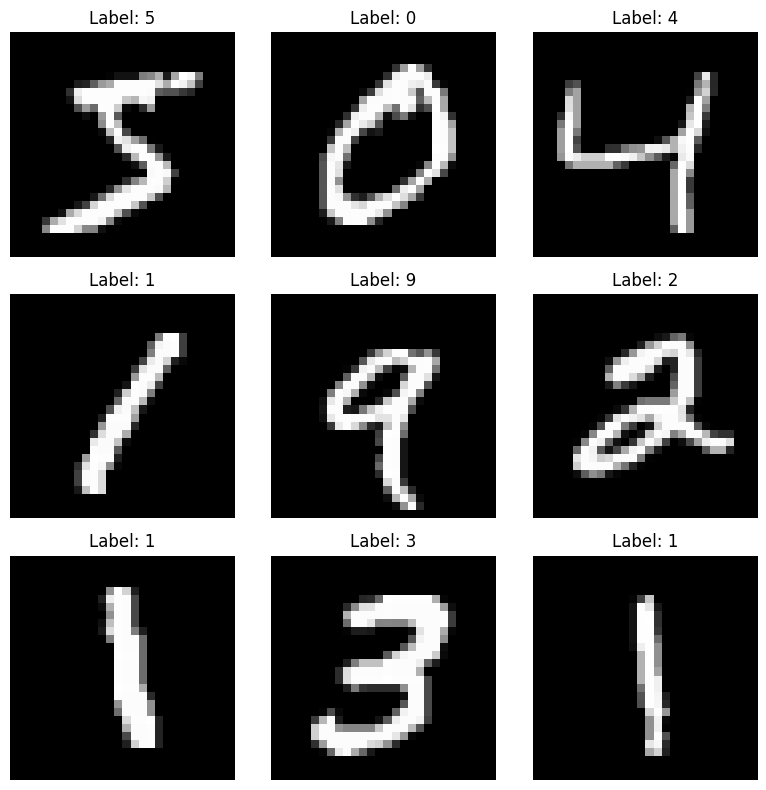

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize some images from the training dataset
def plot_images(images, labels, num_images=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot first 9 images
plot_images(x_train, y_train)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


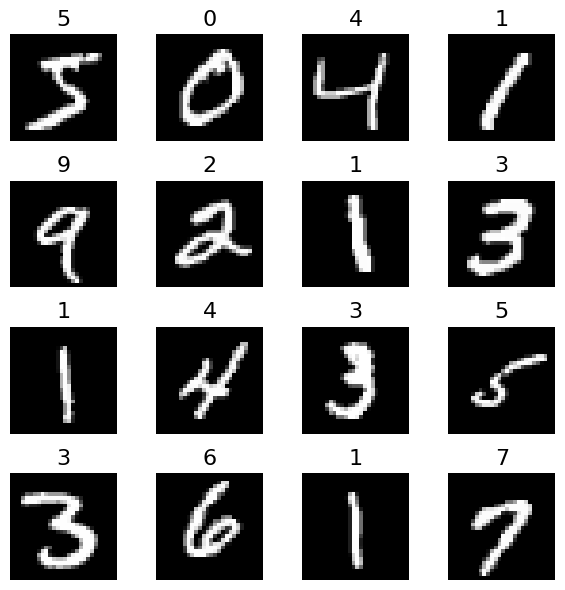

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize images with larger text
def plot_images_with_larger_text(images, labels, num_images=16):
    plt.figure(figsize=(6, 6))  # Adjust figure size
    grid_size = int(num_images**0.5)  # Determine grid dimensions
    for i in range(num_images):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"{labels[i]}", fontsize=16)  # Larger font size
        plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()

# Plot first 16 images with larger text
plot_images_with_larger_text(x_train, y_train, num_images=16)


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def build_cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation
fold_accuracies = []
test_error_rates = []

for train_index, val_index in kf.split(x_train):
    # Split the data
    X_train, X_val = x_train[train_index], x_train[val_index]
    y_train_fold, y_val = y_train[train_index], y_train[val_index]

    # Build and train the model
    model = build_cnn_model((28, 28, 1))
    model.fit(X_train, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate on the validation set
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    fold_accuracies.append(val_accuracy)

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    test_error_rates.append(1 - test_accuracy)

# Calculate final metrics
cross_validated_accuracy = np.mean(fold_accuracies)
final_test_accuracy = np.mean([1 - err_rate for err_rate in test_error_rates])
final_test_error_rate = np.mean(test_error_rates)

# Print final results
print(f"Cross-validated Accuracy: {cross_validated_accuracy * 100:.2f}%")
print(f"Cross-validated Test Error Rate: {np.mean(test_error_rates) * 100:.2f}%")
print(f"Test Set Accuracy: {final_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {final_test_error_rate * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9010 - loss: 0.3239 - val_accuracy: 0.9819 - val_loss: 0.0602
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9874 - val_loss: 0.0424
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9869 - val_loss: 0.0453
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9852 - val_loss: 0.0432
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0141 - val_accuracy: 0.9894 - val_loss: 0.0393
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8984 - loss: 0.3366 - val_accuracy: 0.9772 - val_loss: 0.0708
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9841 - loss: 0.0501 - val_accuracy: 0.9864 - val_loss: 0.0464
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9911 - loss: 0.0295 - val_acc

In [ ]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Initialize a dictionary to store groups of images by digit
digit_groups = {digit: [] for digit in range(10)}

# Separate x_train images into groups by their labels in y_train
for image, label in zip(x_train, y_train):
    digit_groups[label].append(image)

# Convert lists to numpy arrays for each digit
digit_groups = {digit: np.array(images) for digit, images in digit_groups.items()}

# Now, digit_groups[0] contains only images of digit '0',
# digit_groups[1] contains only images of digit '1', and so on up to digit_groups[9]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


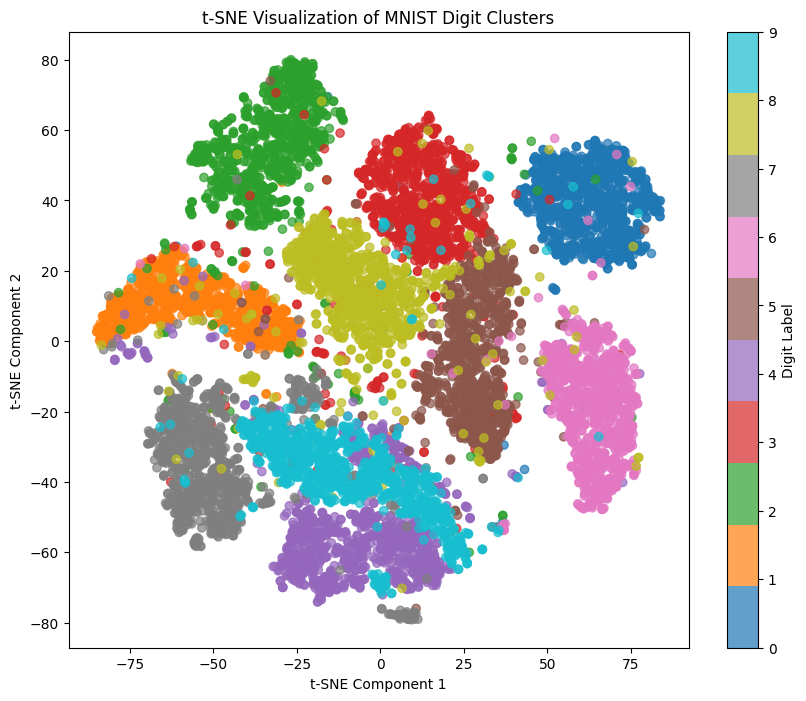

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0

# Select a subset to avoid computational load (optional, e.g., 1000 images per digit)
subset_size = 1000
selected_indices = []

for digit in range(10):
    indices = np.where(y_train == digit)[0][:subset_size]
    selected_indices.extend(indices)

x_subset = x_train[selected_indices]
y_subset = y_train[selected_indices]

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_subset)

# Plot the t-SNE result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_subset, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title("t-SNE Visualization of MNIST Digit Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


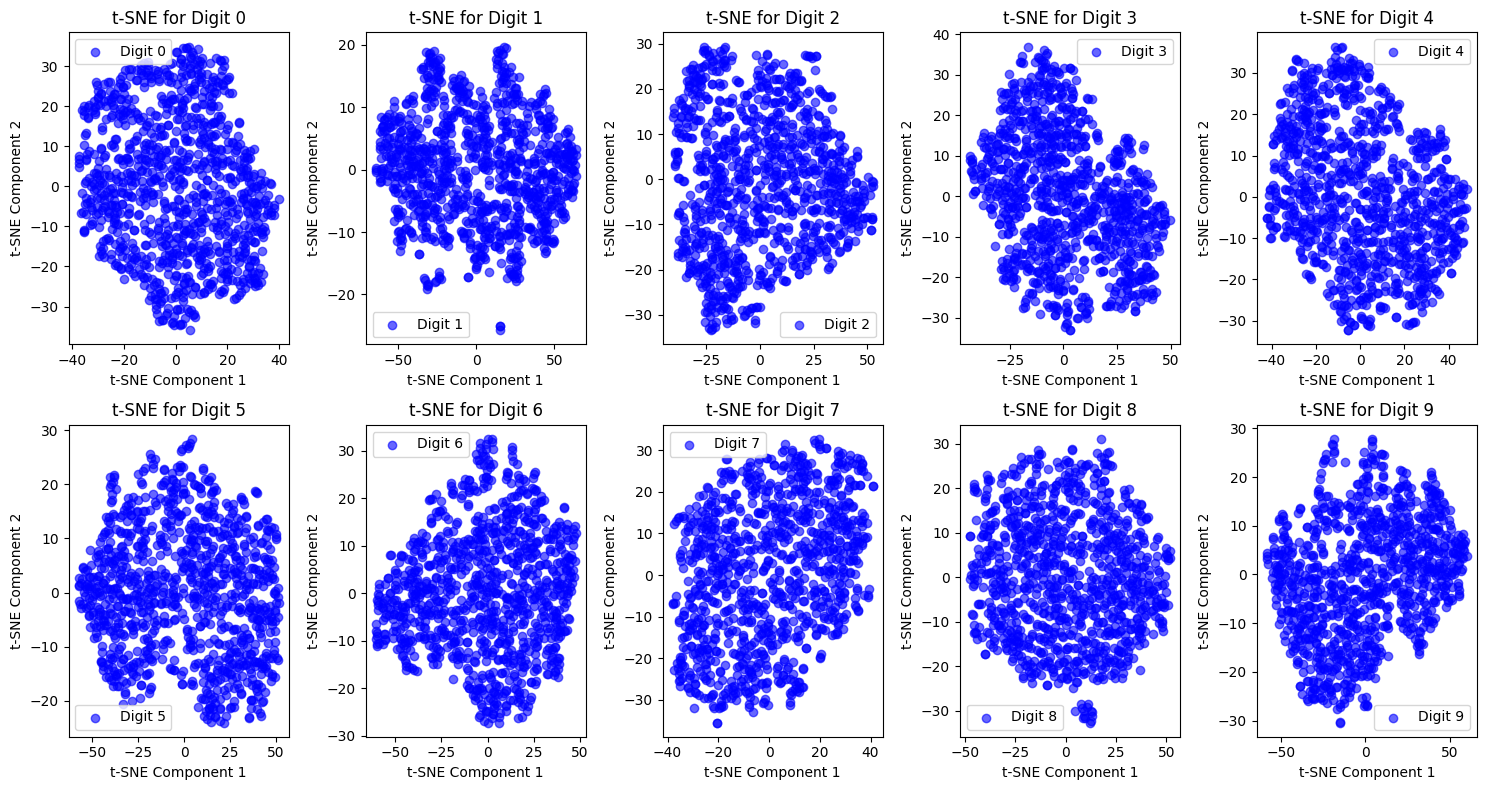

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0

# Dictionary to hold separated groups
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Set up the plotting space
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

# Loop through each digit group and create a t-SNE plot
for digit in range(10):
    # Sample a subset if necessary
    subset = digit_groups[digit][:1000]  # Adjust subset size if needed

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    x_tsne = tsne.fit_transform(subset)

    # Plot
    axes[digit].scatter(x_tsne[:, 0], x_tsne[:, 1], c='blue', alpha=0.6, label=f'Digit {digit}')
    axes[digit].set_title(f"t-SNE for Digit {digit}")
    axes[digit].set_xlabel("t-SNE Component 1")
    axes[digit].set_ylabel("t-SNE Component 2")
    axes[digit].legend()

plt.tight_layout()
plt.show()


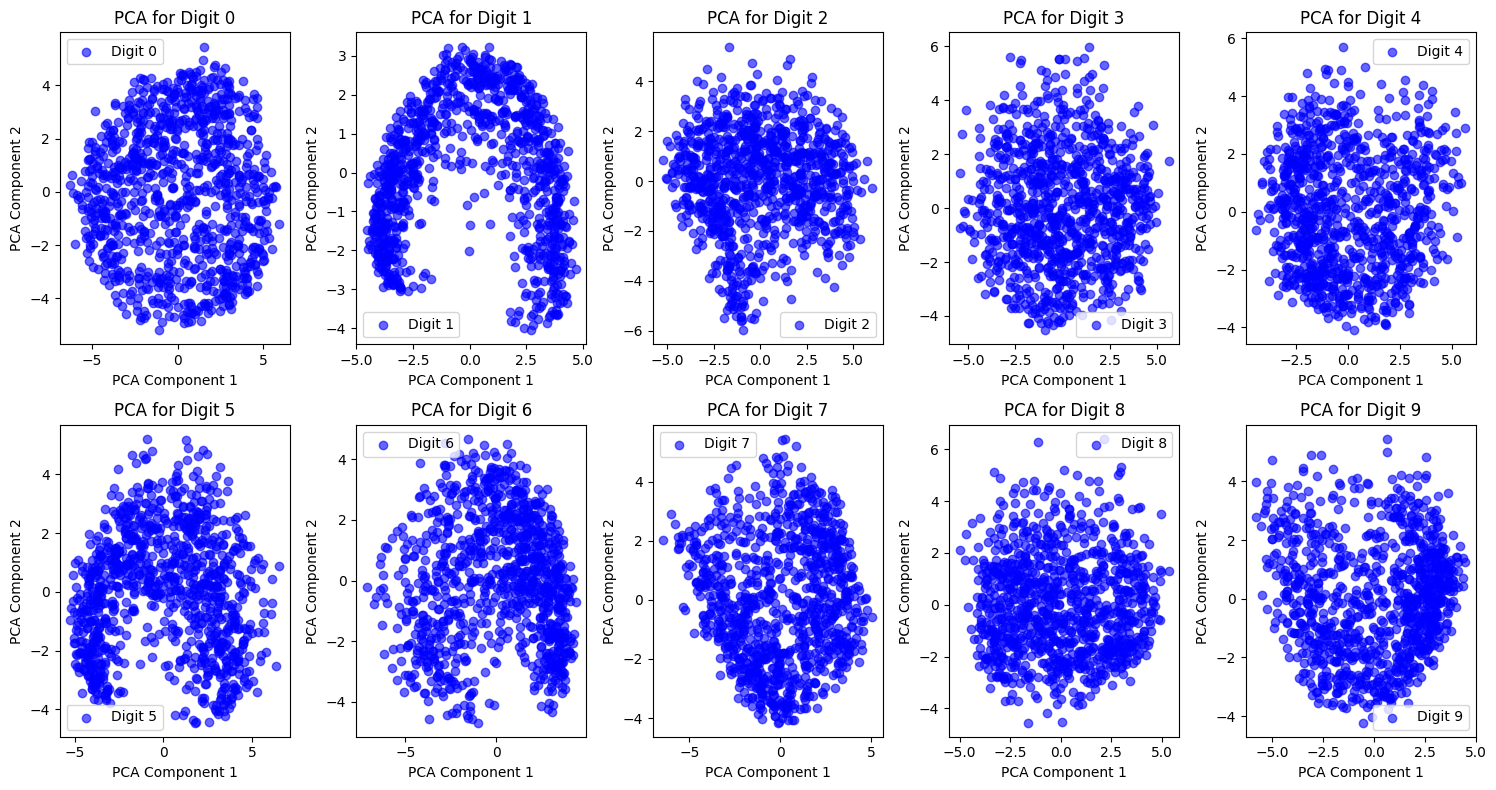

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0

# Dictionary to hold separated groups by digit
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Set up the plotting space
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

# Loop through each digit group and apply PCA
for digit in range(10):
    # Take a subset if necessary
    subset = digit_groups[digit][:1000]  # Adjust subset size if needed

    # Apply PCA
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(subset)

    # Plot
    axes[digit].scatter(x_pca[:, 0], x_pca[:, 1], c='blue', alpha=0.6, label=f'Digit {digit}')
    axes[digit].set_title(f"PCA for Digit {digit}")
    axes[digit].set_xlabel("PCA Component 1")
    axes[digit].set_ylabel("PCA Component 2")
    axes[digit].legend()

plt.tight_layout()
plt.show()


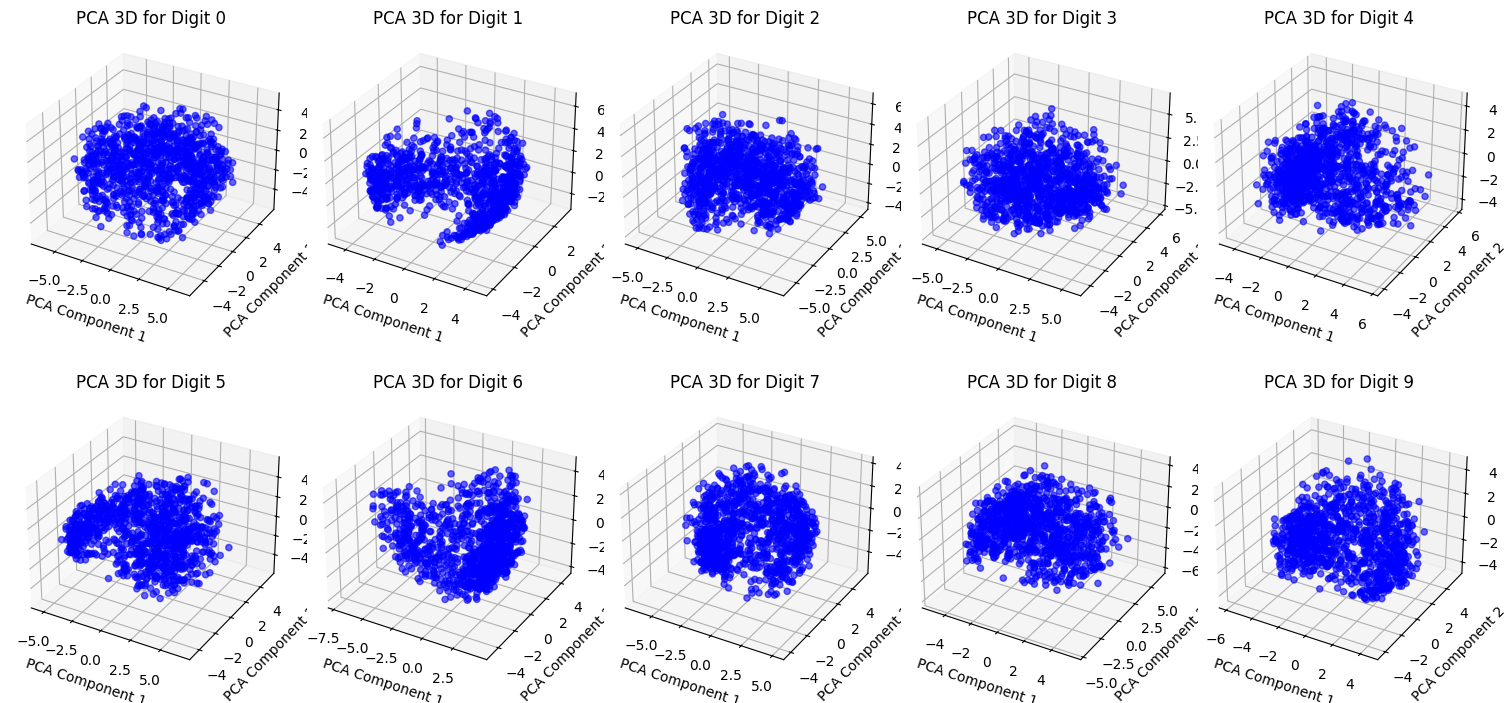

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0

# Dictionary to hold separated groups by digit
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Set up the plotting space for 3D subplots
fig = plt.figure(figsize=(15, 8))

# Loop through each digit group and apply PCA
for digit in range(10):
    # Take a subset if necessary
    subset = digit_groups[digit][:1000]  # Adjust subset size if needed

    # Apply PCA to reduce to 3 components
    pca = PCA(n_components=3)
    x_pca = pca.fit_transform(subset)

    # Create 3D subplot
    ax = fig.add_subplot(2, 5, digit + 1, projection='3d')
    ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c='blue', alpha=0.6)
    ax.set_title(f"PCA 3D for Digit {digit}")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")

plt.tight_layout()
plt.show()


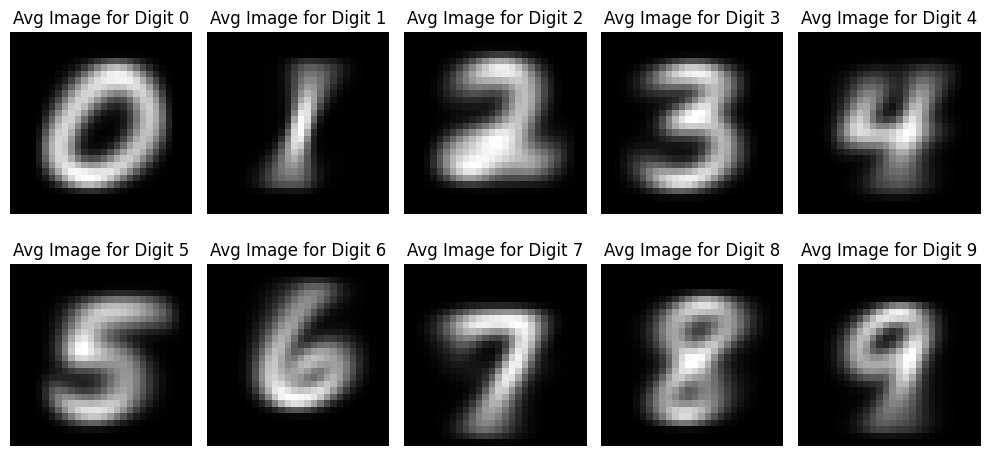

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average image for each digit
average_images = {digit: np.mean(digit_groups[digit], axis=0) for digit in range(10)}

# Plot the average images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for digit in range(10):
    axes[digit].imshow(average_images[digit], cmap='gray')
    axes[digit].set_title(f"Avg Image for Digit {digit}")
    axes[digit].axis('off')

plt.tight_layout()
plt.show()


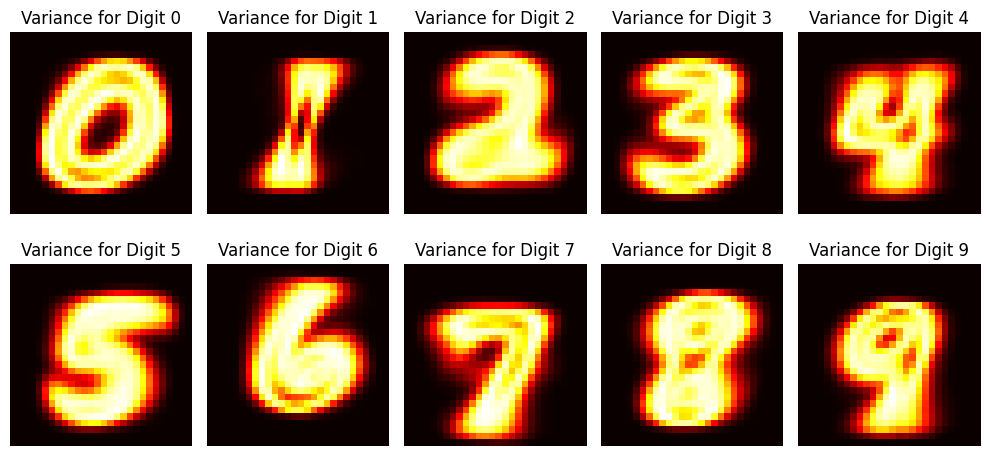

In [ ]:
# Calculate pixel-wise variance for each digit
variance_images = {digit: np.var(digit_groups[digit], axis=0) for digit in range(10)}

# Plot the variance images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()
for digit in range(10):
    axes[digit].imshow(variance_images[digit], cmap='hot')
    axes[digit].set_title(f"Variance for Digit {digit}")
    axes[digit].axis('off')

plt.tight_layout()
plt.show()


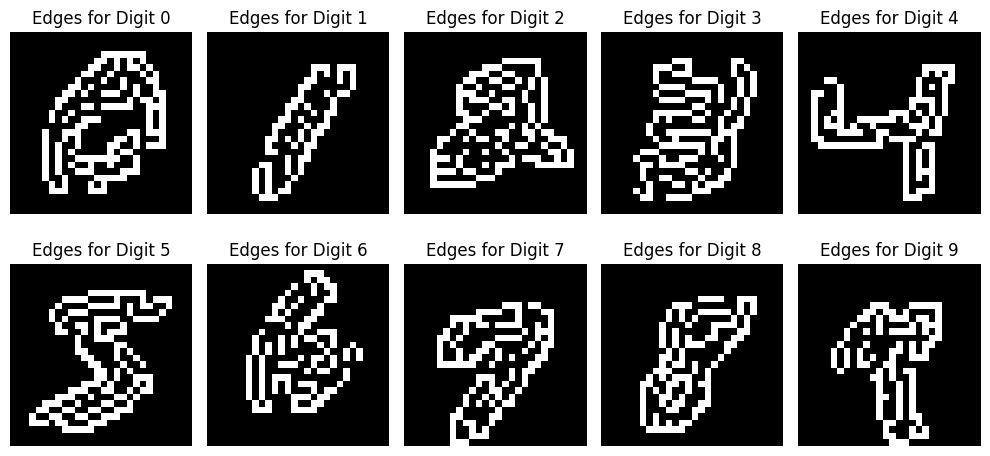

In [ ]:
import cv2

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.flatten()

for digit in range(10):
    # Select a sample image from each digit
    sample_image = digit_groups[digit][0]  # Choosing the first image for simplicity

    # Apply edge detection
    edges = cv2.Canny((sample_image * 255).astype(np.uint8), threshold1=50, threshold2=150)

    # Plot edges
    axes[digit].imshow(edges, cmap='gray')
    axes[digit].set_title(f"Edges for Digit {digit}")
    axes[digit].axis('off')

plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


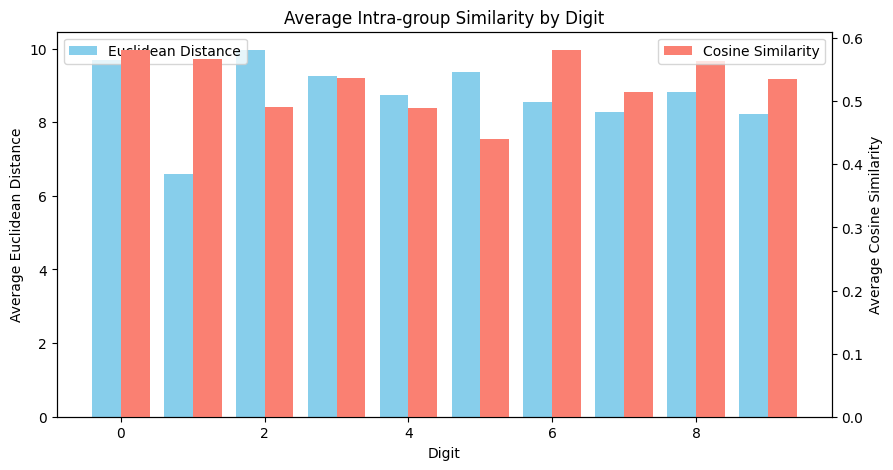

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0

# Separate the dataset by digits
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Calculate average intra-group Euclidean and Cosine similarity for each digit
euclidean_distances_mean = []
cosine_similarities_mean = []

for digit in range(10):
    # Select a subset to make computation manageable
    subset = digit_groups[digit][:100]  # Choose up to 100 images per digit

    # Euclidean distances within the subset
    euclidean_dists = euclidean_distances(subset)
    euclidean_mean = np.mean(euclidean_dists)
    euclidean_distances_mean.append(euclidean_mean)

    # Cosine similarities within the subset
    cosine_sims = cosine_similarity(subset)
    cosine_mean = np.mean(cosine_sims)
    cosine_similarities_mean.append(cosine_mean)

# Plotting the average distances
digits = np.arange(10)
fig, ax1 = plt.subplots(figsize=(10, 5))

# Euclidean distances
ax1.bar(digits - 0.2, euclidean_distances_mean, width=0.4, label="Euclidean Distance", color="skyblue")
ax1.set_ylabel("Average Euclidean Distance")
ax1.set_xlabel("Digit")
ax1.set_title("Average Intra-group Similarity by Digit")
ax1.legend(loc="upper left")

# Cosine similarities (plotting on secondary y-axis)
ax2 = ax1.twinx()
ax2.bar(digits + 0.2, cosine_similarities_mean, width=0.4, label="Cosine Similarity", color="salmon")
ax2.set_ylabel("Average Cosine Similarity")
ax2.legend(loc="upper right")

plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


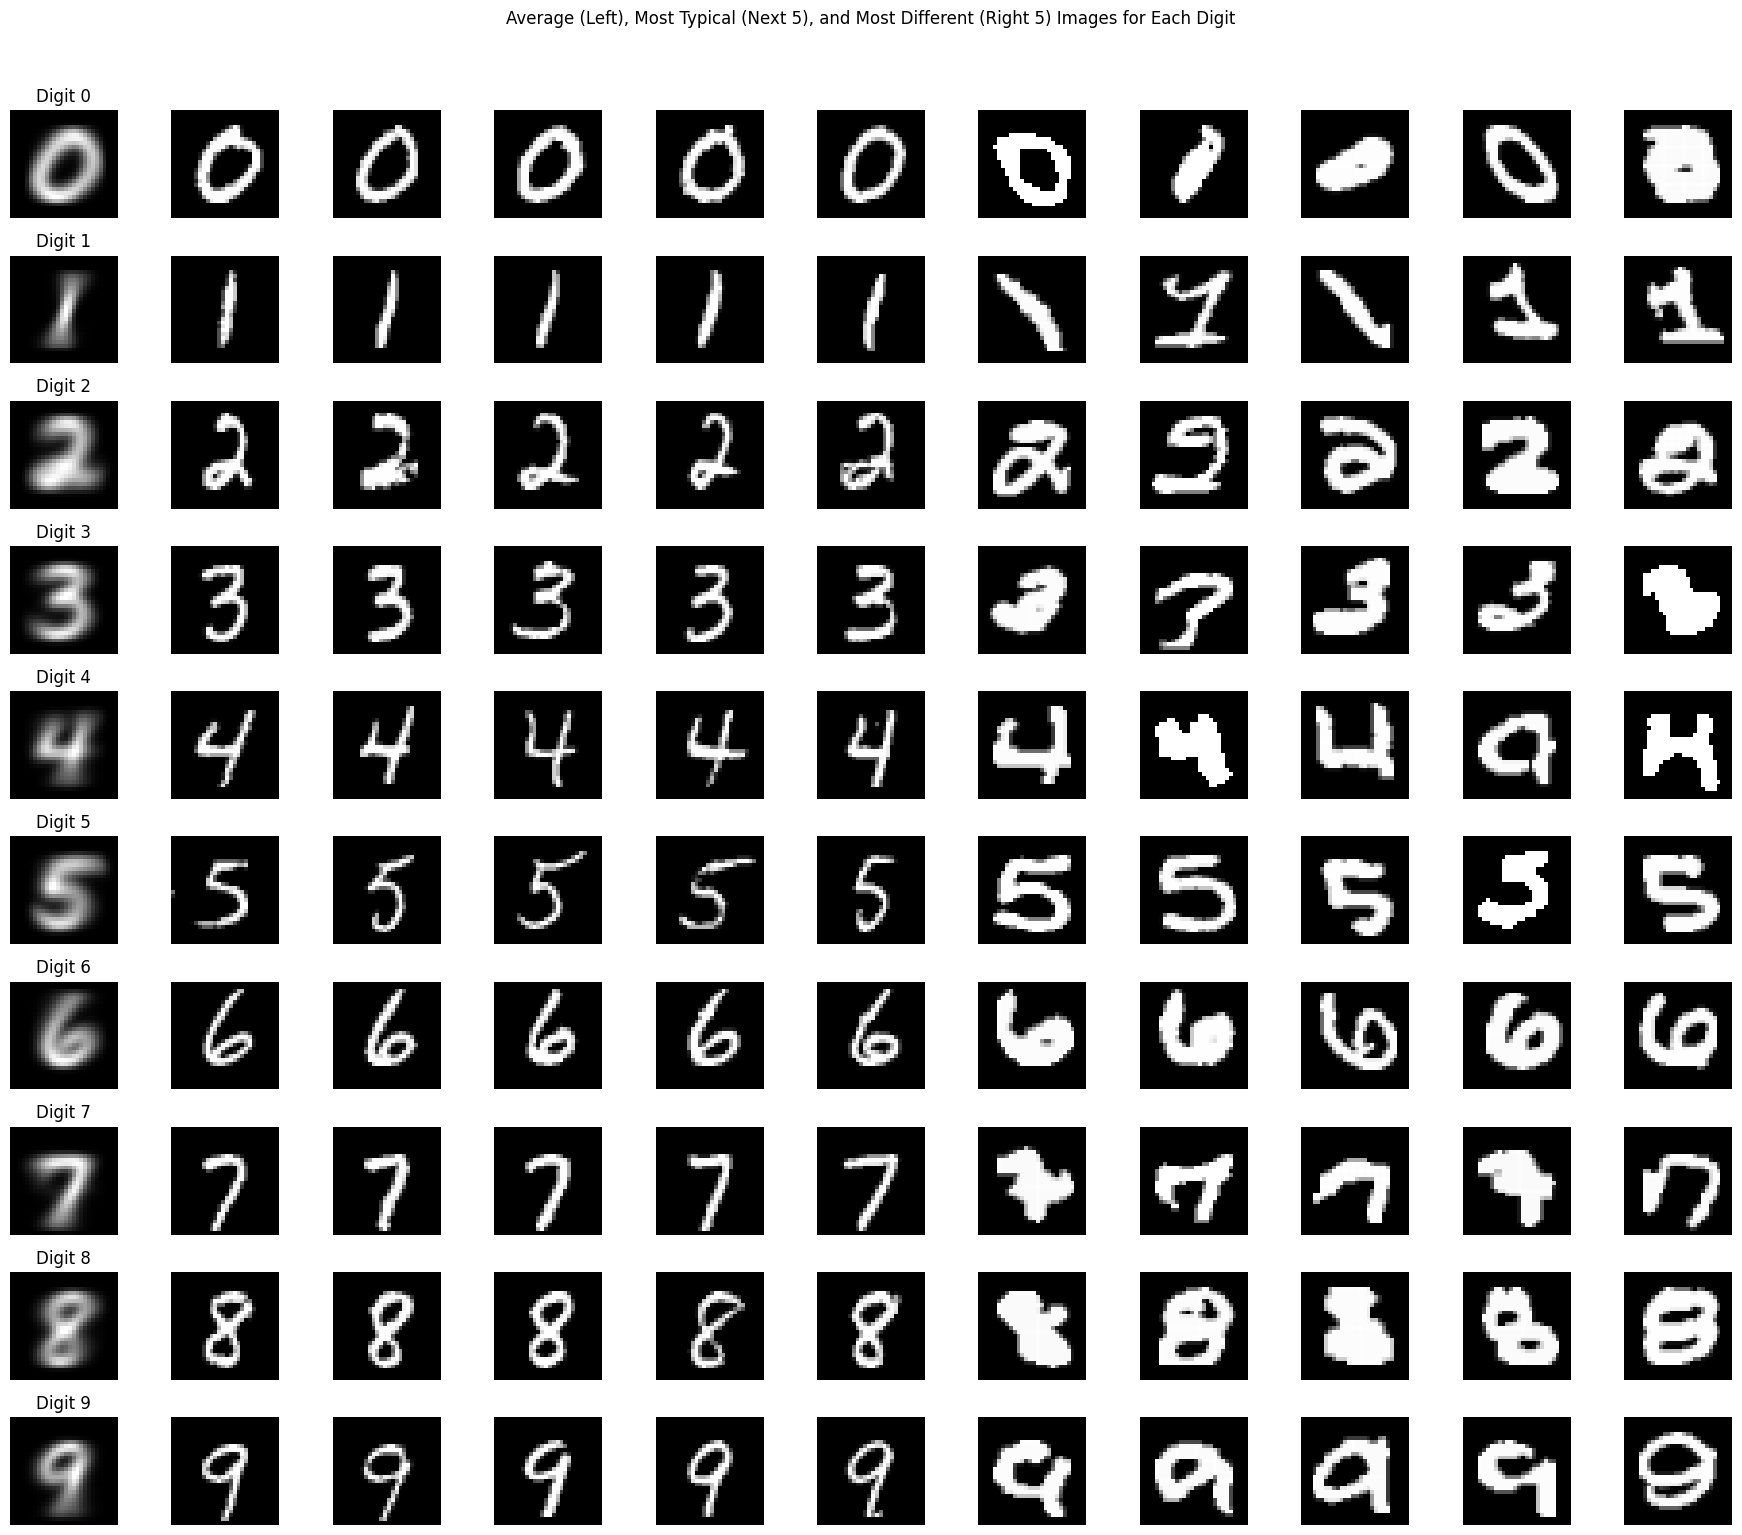

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.astype("float32") / 255.0

# Separate the dataset by digits
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Function to get the most and least typical images based on distance from the average
def get_typical_and_outlier_images(digit_images, num_images=5):
    # Compute the average image for the digit group
    average_image = np.mean(digit_images, axis=0)

    # Calculate distances of each image from the average image
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Find indices of the most and least typical images
    most_typical_indices = np.argsort(distances)[:num_images]    # closest to average
    most_different_indices = np.argsort(distances)[-num_images:]  # farthest from average

    return average_image, digit_images[most_typical_indices], digit_images[most_different_indices]

# Plotting average, typical, and varied samples for each digit
fig, axes = plt.subplots(10, 11, figsize=(18, 15))  # Add an extra column for average images
plt.suptitle("Average (Left), Most Typical (Next 5), and Most Different (Right 5) Images for Each Digit", y=1.02)

for digit in range(10):
    # Get average, typical, and varied images
    average_image, typical_images, different_images = get_typical_and_outlier_images(digit_groups[digit])

    # Plot the average image (first column)
    axes[digit, 0].imshow(average_image, cmap='gray')
    axes[digit, 0].set_title(f"Digit {digit}")
    axes[digit, 0].axis('off')

    # Plot the typical images (next 5 columns)
    for i in range(5):
        axes[digit, i + 1].imshow(typical_images[i], cmap='gray')
        axes[digit, i + 1].axis('off')

    # Plot the different images (last 5 columns)
    for i in range(5):
        axes[digit, i + 6].imshow(different_images[i], cmap='gray')
        axes[digit, i + 6].axis('off')

plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


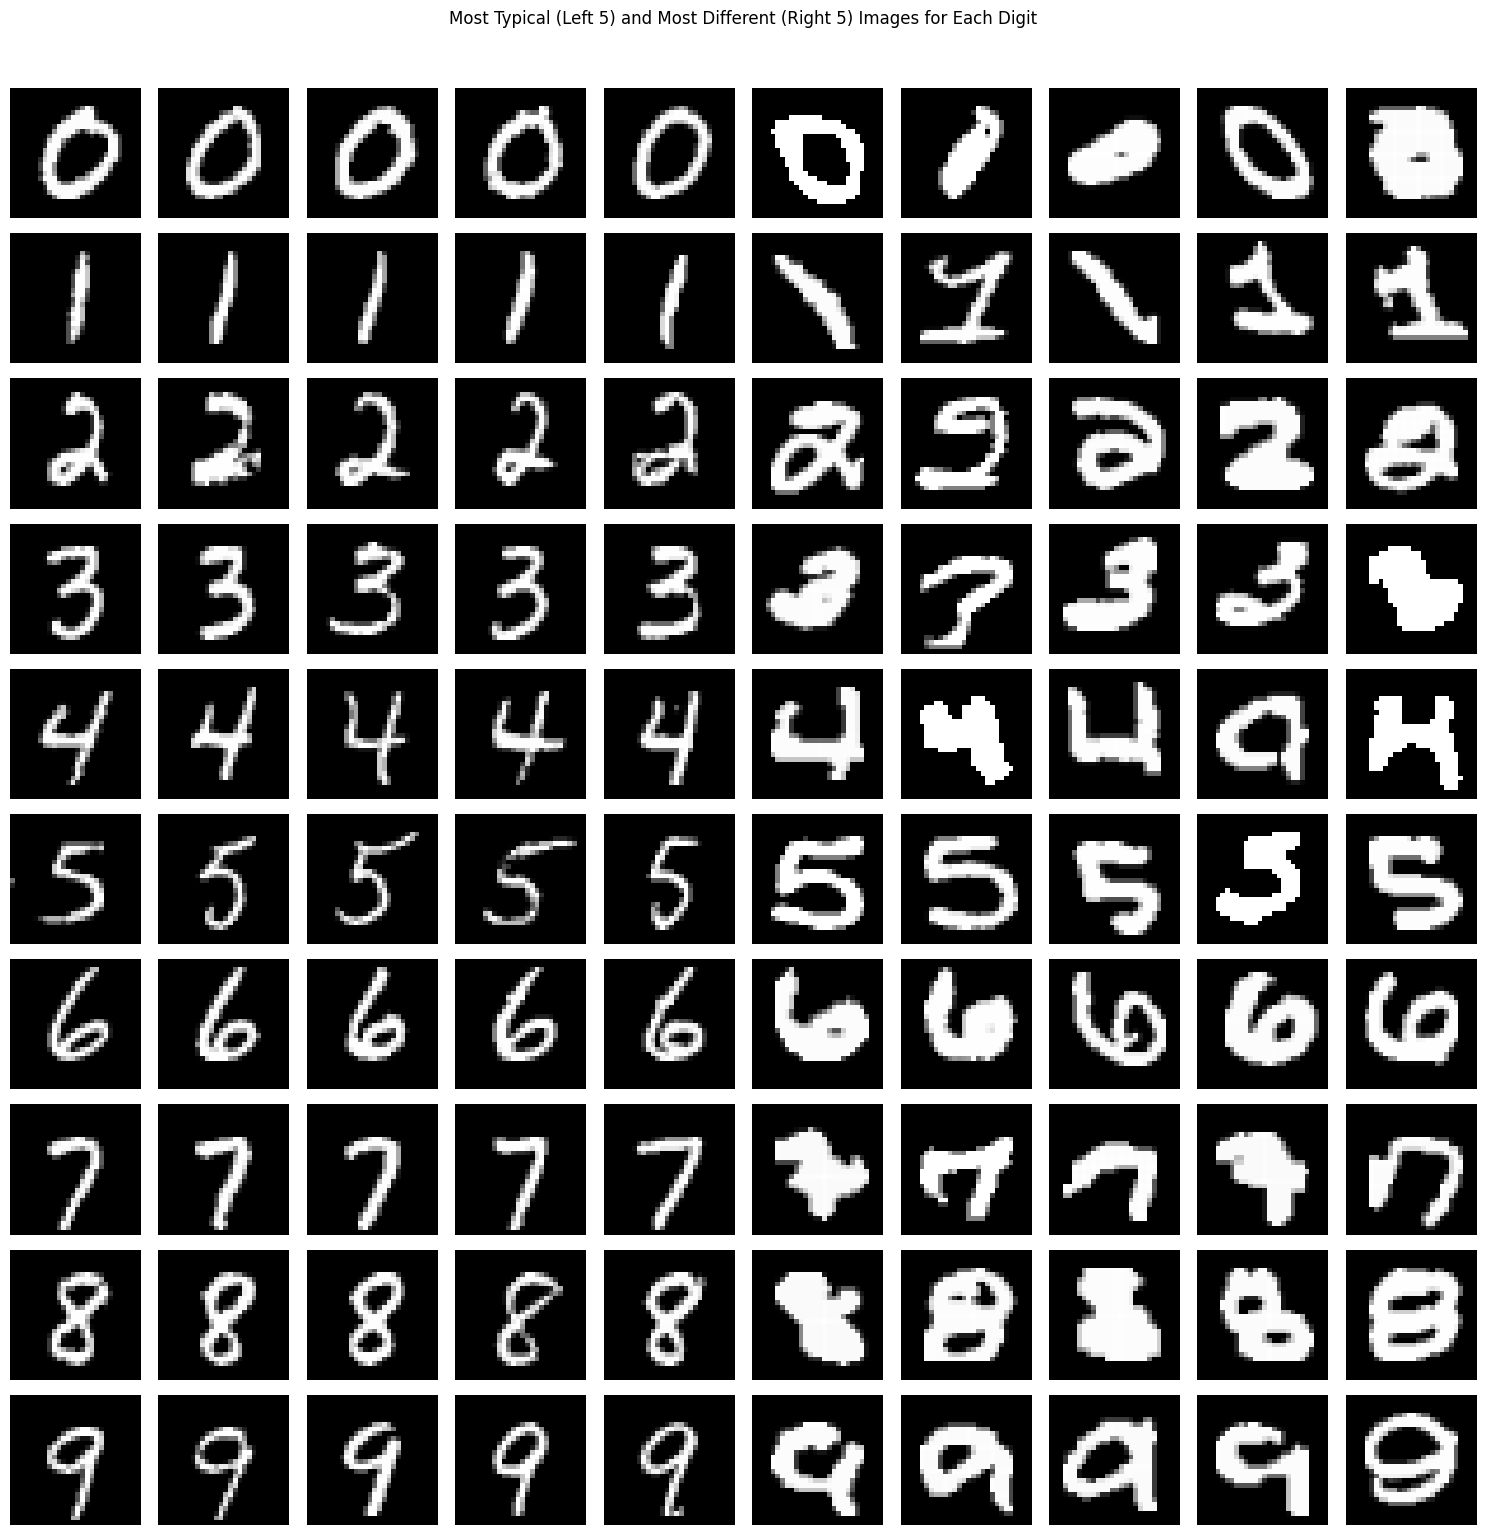

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.astype("float32") / 255.0

# Separate the dataset by digits
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Function to get the most and least typical images based on distance from the average
def get_typical_and_outlier_images(digit_images, num_images=5):
    # Compute the average image for the digit group
    average_image = np.mean(digit_images, axis=0)

    # Calculate distances of each image from the average image
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Find indices of the most and least typical images
    most_typical_indices = np.argsort(distances)[:num_images]    # closest to average
    most_different_indices = np.argsort(distances)[-num_images:]  # farthest from average

    return digit_images[most_typical_indices], digit_images[most_different_indices]

# Plotting typical and varied samples for each digit
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
plt.suptitle("Most Typical (Left 5) and Most Different (Right 5) Images for Each Digit", y=1.02)

for digit in range(10):
    # Get typical and varied images
    typical_images, different_images = get_typical_and_outlier_images(digit_groups[digit])

    # Plot the typical images (left side)
    for i in range(5):
        axes[digit, i].imshow(typical_images[i], cmap='gray')
        axes[digit, i].axis('off')

    # Plot the different images (right side)
    for i in range(5):
        axes[digit, i + 5].imshow(different_images[i], cmap='gray')
        axes[digit, i + 5].axis('off')

plt.tight_layout()
plt.show()


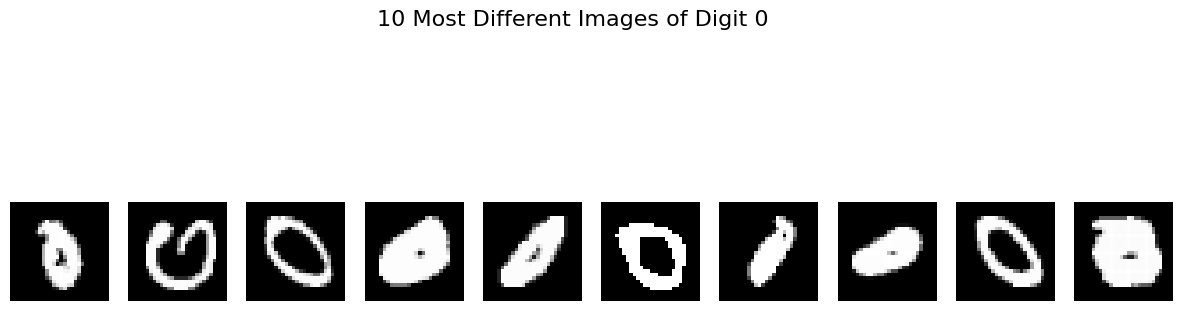

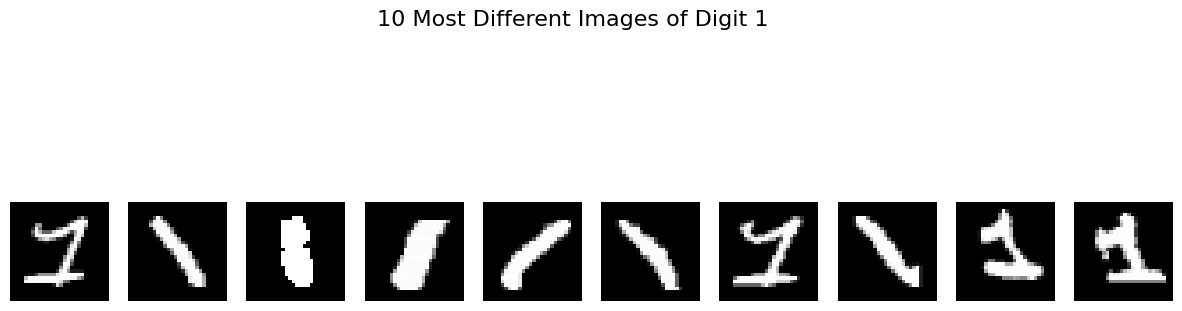

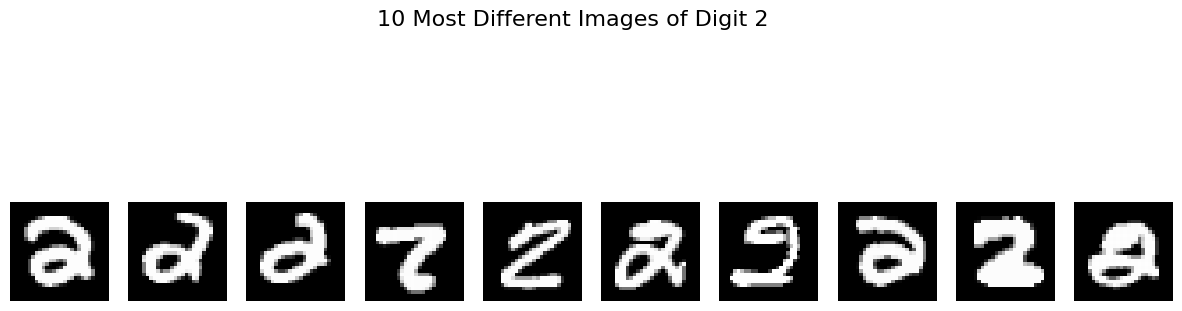

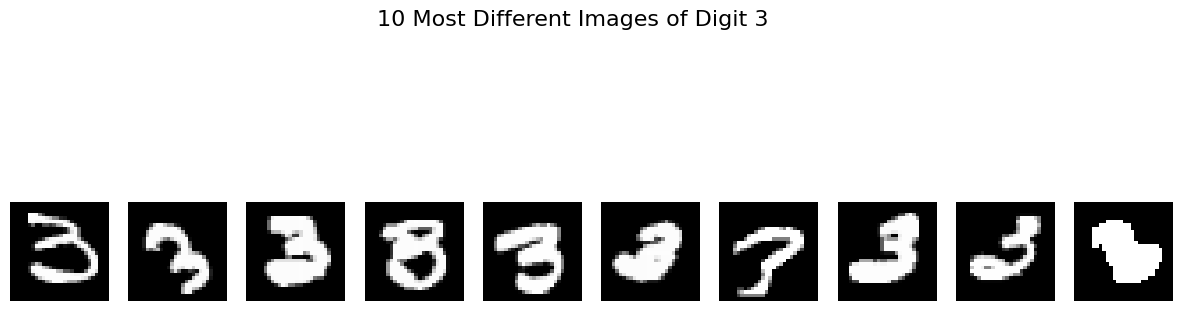

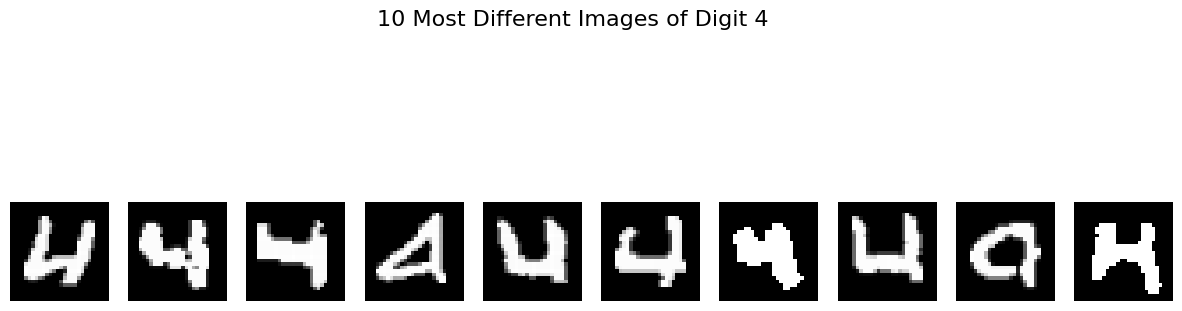

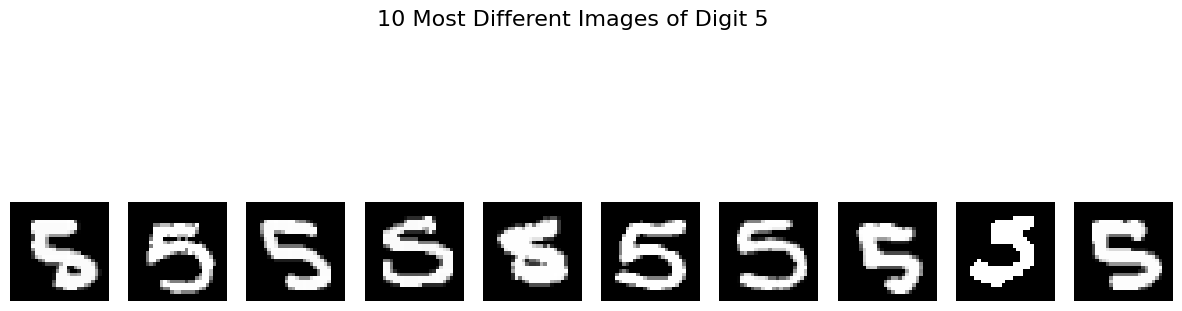

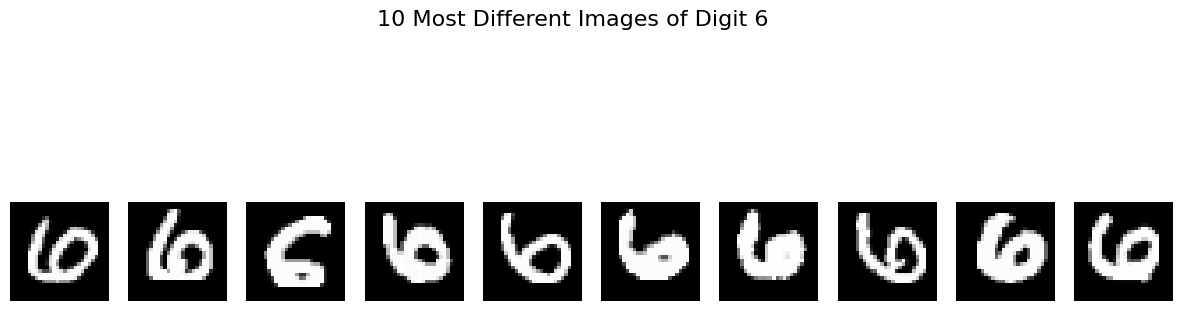

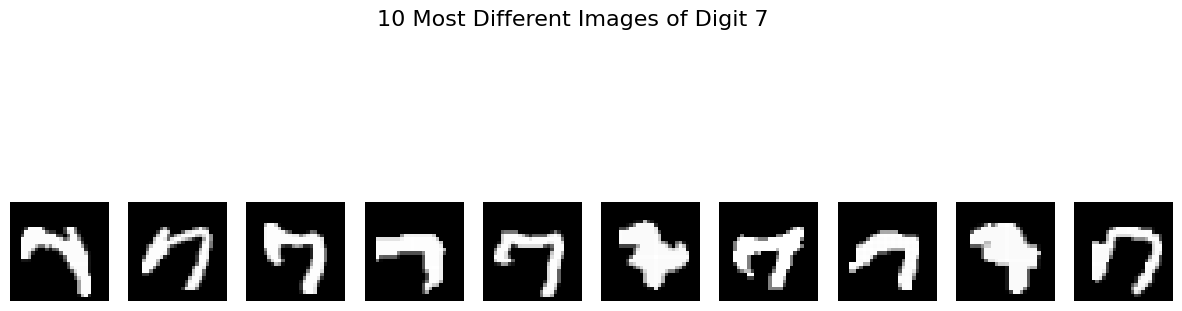

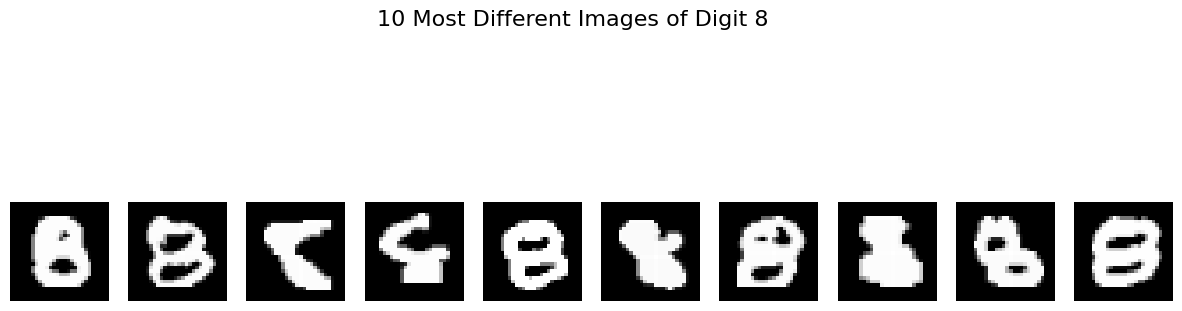

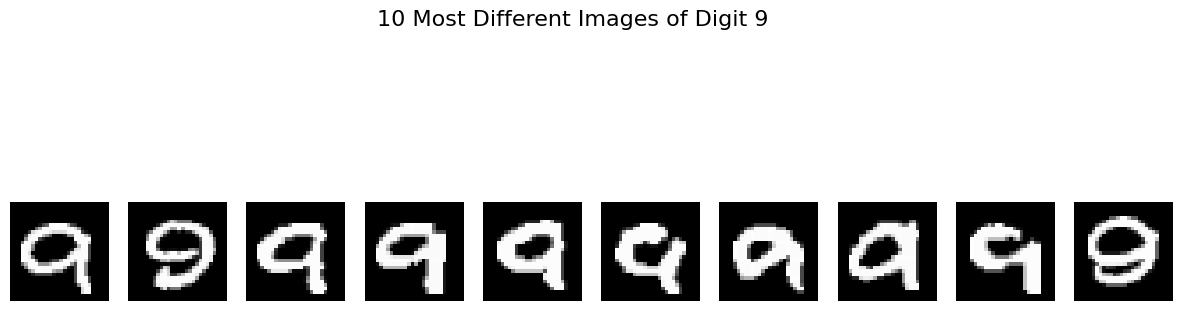

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Set the number of images to display for each digit
num_images = 10

# Loop through each digit (0-9)
for digit in range(10):
    # Get all images of the current digit
    digit_images = x_train[y_train == digit]

    # Calculate the average image for this digit
    average_image = np.mean(digit_images, axis=0)

    # Calculate distances of each image from the average image
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Find the 10 most different images (farthest from the average image)
    most_different_indices = np.argsort(distances)[-num_images:]
    most_different_images = digit_images[most_different_indices]

    # Plot the most different images for this digit
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle(f"10 Most Different Images of Digit {digit}", fontsize=16)

    for i, img in enumerate(most_different_images):
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')

    plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from scipy import stats

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Initialize dictionaries to store results
distance_stats = {digit: {} for digit in range(10)}

# Loop through each digit (0-9)
for digit in range(10):
    # Get all images of the current digit
    digit_images = x_train[y_train == digit]

    # Calculate the average image for this digit
    average_image = np.mean(digit_images, axis=0)

    # Calculate Euclidean distances of each image from the average image
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Calculate mean, median, and mode of the distances
    mean_distance = np.mean(distances)
    median_distance = np.median(distances)
#    mode_distance = stats.mode(distances)[0][0]  # mode returns a tuple; the mode value is at index [0][0]

    # Store the results
    distance_stats[digit] = {
        'mean': mean_distance,
        'median': median_distance,
#        'mode': mode_distance
    }

# Display the statistics for each digit
for digit, stats in distance_stats.items():
    print(f"Digit {digit}:")
    print(f"  Mean Distance: {stats['mean']:.2f}")
    print(f"  Median Distance: {stats['median']:.2f}")
#    print(f"  Mode Distance: {stats['mode']:.2f}\n")


Digit 0:
  Mean Distance: 1789.39
  Median Distance: 1774.83
Digit 1:
  Mean Distance: 1182.51
  Median Distance: 1120.70
Digit 2:
  Mean Distance: 1807.68
  Median Distance: 1794.35
Digit 3:
  Mean Distance: 1694.59
  Median Distance: 1663.08
Digit 4:
  Mean Distance: 1615.99
  Median Distance: 1581.20
Digit 5:
  Mean Distance: 1746.34
  Median Distance: 1714.69
Digit 6:
  Mean Distance: 1655.96
  Median Distance: 1597.83
Digit 7:
  Mean Distance: 1541.12
  Median Distance: 1502.09
Digit 8:
  Mean Distance: 1706.49
  Median Distance: 1665.21
Digit 9:
  Mean Distance: 1563.62
  Median Distance: 1501.82


In [ ]:
import numpy as np
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Initialize dictionary to store results
distance_counts = {digit: {} for digit in range(10)}

# Loop through each digit (0-9)
for digit in range(10):
    # Get all images of the current digit
    digit_images = x_train[y_train == digit]

    # Calculate the average image for this digit
    average_image = np.mean(digit_images, axis=0)

    # Calculate Euclidean distances of each image from the average image
    distances = np.array([np.linalg.norm(img - average_image) for img in digit_images])

    # Calculate mean and median of the distances
    mean_distance = np.mean(distances)
    median_distance = np.median(distances)

    # Count the number of images with distances equal to, less than, and greater than the mean and median
    mean_equal_count = np.sum(distances == mean_distance)
    mean_less_count = np.sum(distances < mean_distance)
    mean_greater_count = np.sum(distances > mean_distance)

    median_equal_count = np.sum(distances == median_distance)
    median_less_count = np.sum(distances < median_distance)
    median_greater_count = np.sum(distances > median_distance)

    # Store the results
    distance_counts[digit] = {
        'mean_equal': mean_equal_count,
        'mean_less': mean_less_count,
        'mean_greater': mean_greater_count,
        'median_equal': median_equal_count,
        'median_less': median_less_count,
        'median_greater': median_greater_count
    }

# Display the statistics for each digit
for digit, counts in distance_counts.items():
    print(f"Digit {digit}:")
    print(f"  Equal to Mean: {counts['mean_equal']}")
    print(f"  Less than Mean: {counts['mean_less']}")
    print(f"  Greater than Mean: {counts['mean_greater']}")
    print(f"  Equal to Median: {counts['median_equal']}")
    print(f"  Less than Median: {counts['median_less']}")
    print(f"  Greater than Median: {counts['median_greater']}\n")


Digit 0:
  Equal to Mean: 0
  Less than Mean: 3112
  Greater than Mean: 2811
  Equal to Median: 1
  Less than Median: 2961
  Greater than Median: 2961

Digit 1:
  Equal to Mean: 0
  Less than Mean: 3980
  Greater than Mean: 2762
  Equal to Median: 0
  Less than Median: 3371
  Greater than Median: 3371

Digit 2:
  Equal to Mean: 0
  Less than Mean: 3149
  Greater than Mean: 2809
  Equal to Median: 0
  Less than Median: 2979
  Greater than Median: 2979

Digit 3:
  Equal to Mean: 0
  Less than Mean: 3380
  Greater than Mean: 2751
  Equal to Median: 1
  Less than Median: 3065
  Greater than Median: 3065

Digit 4:
  Equal to Mean: 0
  Less than Mean: 3300
  Greater than Mean: 2542
  Equal to Median: 0
  Less than Median: 2921
  Greater than Median: 2921

Digit 5:
  Equal to Mean: 0
  Less than Mean: 3036
  Greater than Mean: 2385
  Equal to Median: 1
  Less than Median: 2710
  Greater than Median: 2710

Digit 6:
  Equal to Mean: 0
  Less than Mean: 3498
  Greater than Mean: 2420
  Equal to 

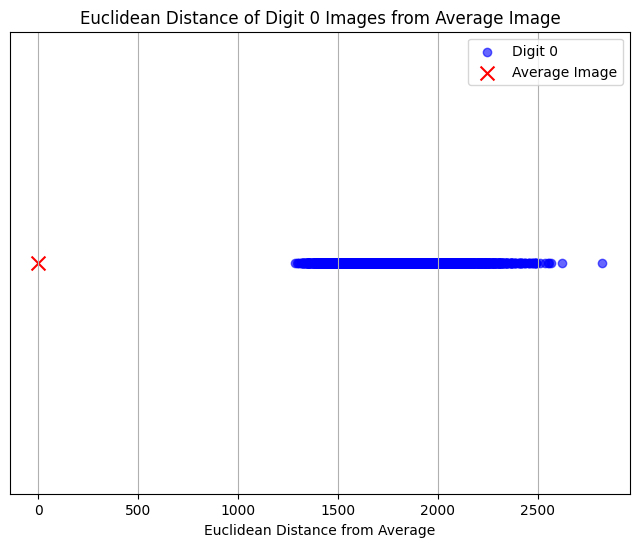

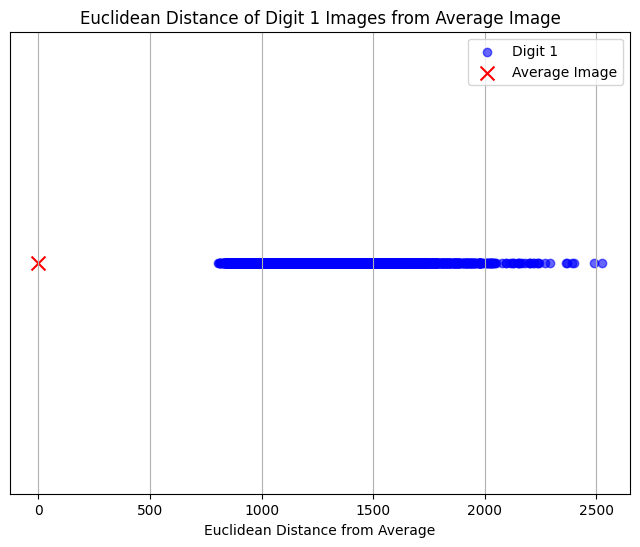

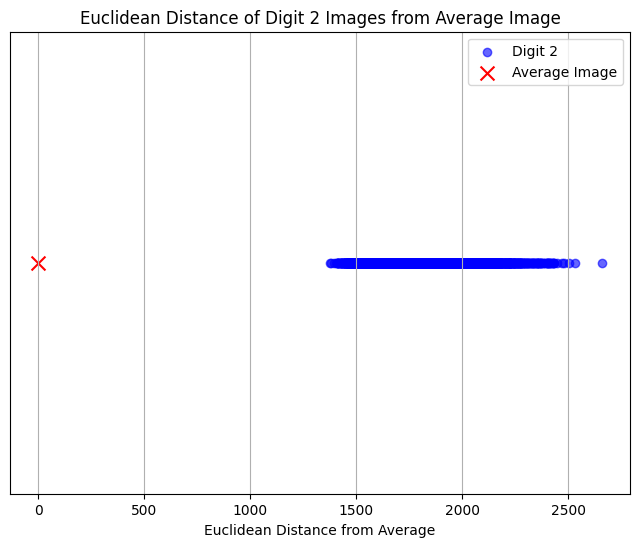

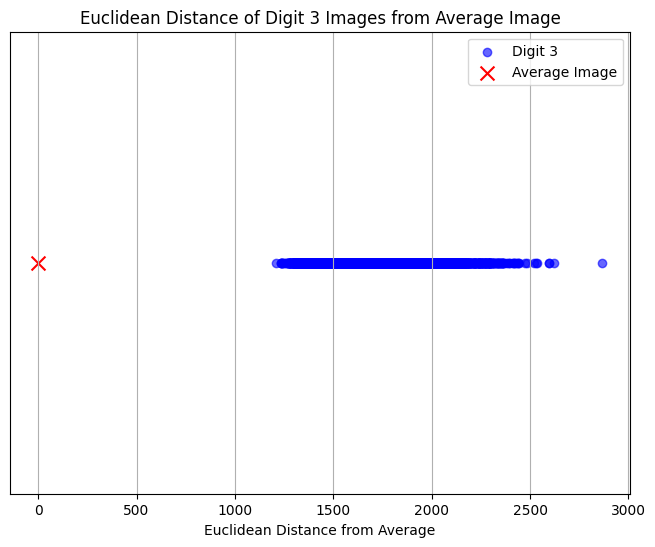

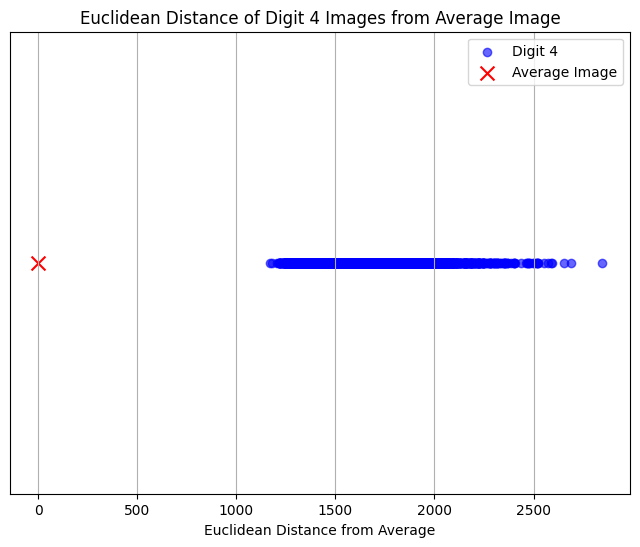

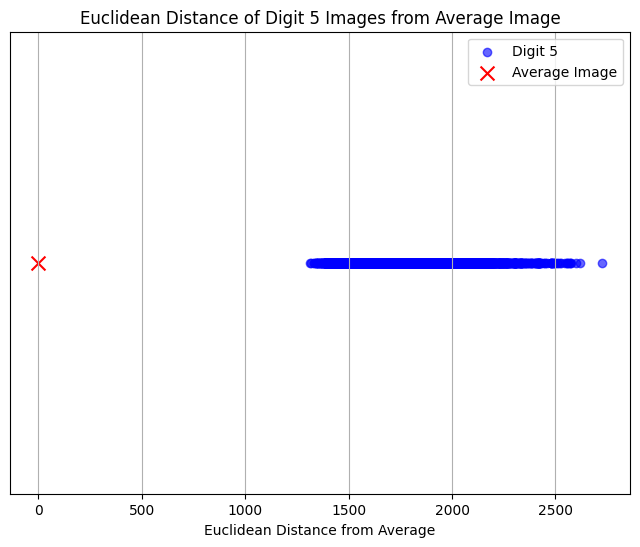

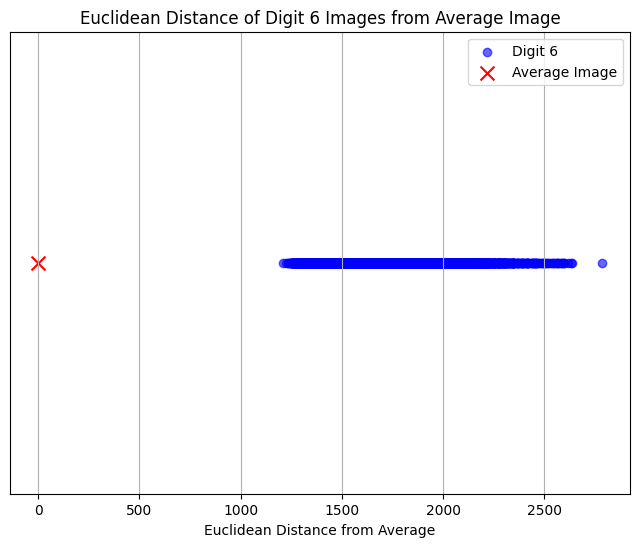

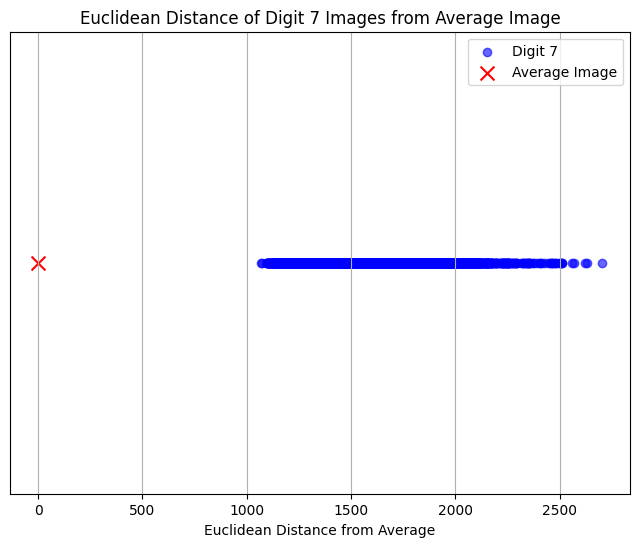

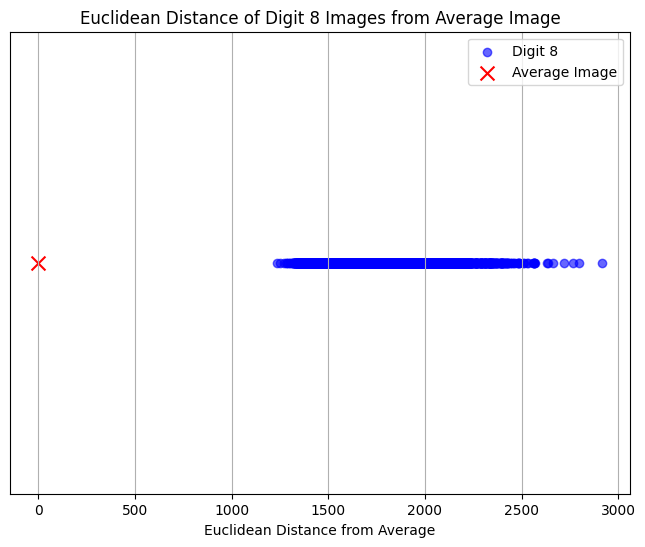

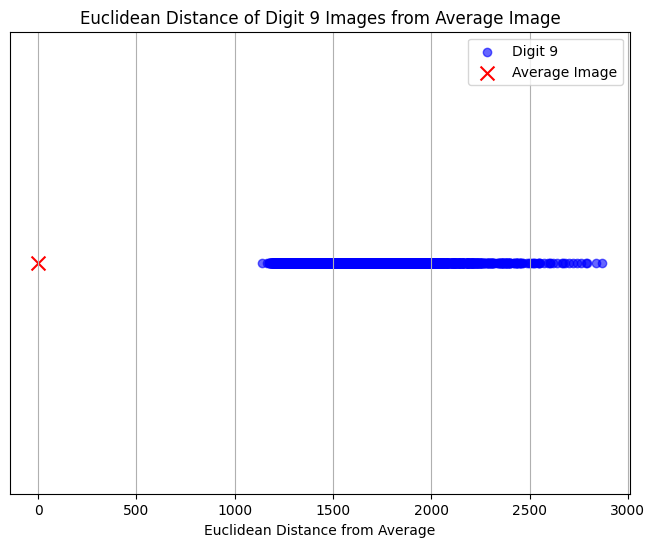

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Loop through each digit (0-9)
for digit in range(10):
    # Get all images of the current digit
    digit_images = x_train[y_train == digit]

    # Calculate the average image for this digit and flatten it
    average_image = np.mean(digit_images, axis=0).flatten()

    # Flatten all images of the current digit
    flattened_images = digit_images.reshape(digit_images.shape[0], -1)

    # Calculate Euclidean distances of each flattened image from the average image
    distances = np.linalg.norm(flattened_images - average_image, axis=1)

    # Plot the distances as points in a 2D plot, with each point's distance from the origin (average image)
    plt.figure(figsize=(8, 6))
    plt.scatter(distances, np.zeros_like(distances), alpha=0.6, c='blue', label=f'Digit {digit}')

    # Highlight the average image at the origin
    plt.scatter(0, 0, color='red', marker='x', s=100, label='Average Image')

    # Customize plot
    plt.title(f'Euclidean Distance of Digit {digit} Images from Average Image')
    plt.xlabel('Euclidean Distance from Average')
    plt.ylabel('')
    plt.yticks([])  # Remove y-axis as we're only interested in distance
    plt.legend()
    plt.grid(True)

    # Show plot for this digit
    plt.show()


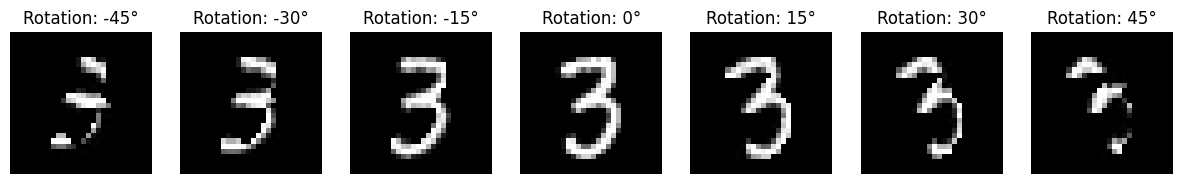

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Separate the images of a specific digit, e.g., digit "3"
digit = 3  # choose the digit you want to process
digit_images = x_train[y_train == digit]

# Calculate the average image for this digit
average_image = np.mean(digit_images, axis=0)

# Calculate distances of each image from the average image
distances = [np.linalg.norm(img - average_image) for img in digit_images]

# Find the most typical images
most_typical_indices = np.argsort(distances)[:1]  # only take the first most typical image
most_typical_image = digit_images[most_typical_indices[0]]  # get the most typical image

# Define a range of rotation angles
rotation_angles = [-45,-30, -15, 0, 15, 30, 45]

# Plot each rotated image
fig, axes = plt.subplots(1, len(rotation_angles), figsize=(15, 5))

for i, angle in enumerate(rotation_angles):
    # Create a rotated version of the digit (preserving the background)
    rotated_image = np.zeros_like(most_typical_image)  # Initialize with zeros for background

    # Rotate only the digit by applying rotation to non-zero pixels
    non_zero_pixels = most_typical_image > 0
    rotated_digit = rotate(most_typical_image * non_zero_pixels, angle, reshape=False)

    # Keep the rotated digit on the original background
    rotated_image[non_zero_pixels] = rotated_digit[non_zero_pixels]

    # Display the rotated image
    axes[i].imshow(rotated_image, cmap='gray')
    axes[i].set_title(f'Rotation: {angle}°')
    axes[i].axis('off')

plt.show()


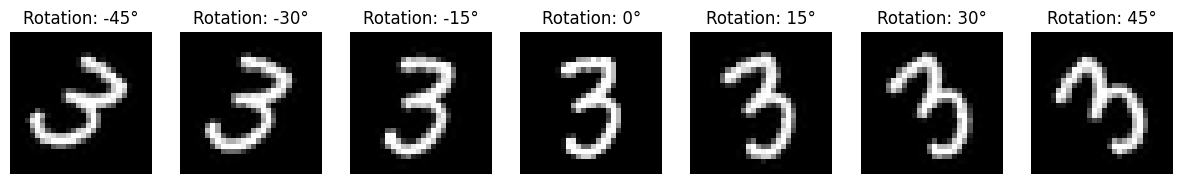

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Separate the images of a specific digit, e.g., digit "3"
digit = 3  # choose the digit you want to process
digit_images = x_train[y_train == digit]

# Calculate the average image for this digit
average_image = np.mean(digit_images, axis=0)

# Calculate distances of each image from the average image
distances = [np.linalg.norm(img - average_image) for img in digit_images]

# Find the most typical images
most_typical_indices = np.argsort(distances)[:1]  # only take the first most typical image
most_typical_image = digit_images[most_typical_indices[0]]  # get the most typical image

# Define a range of rotation angles
rotation_angles = [-45, -30, -15, 0, 15, 30, 45]
#rotation_angles = range(-45, 50, 5)
# Define padding size to prevent digit cut-off
padding_size = 8
padded_image = np.pad(most_typical_image, padding_size, mode='constant', constant_values=0)

# Set up the plot
fig, axes = plt.subplots(1, len(rotation_angles), figsize=(15, 5))

for i, angle in enumerate(rotation_angles):
    # Rotate the padded image to avoid clipping
    rotated_padded_image = rotate(padded_image, angle, reshape=False)

    # Crop back to the original size (28x28)
    start = padding_size
    end = start + 28
    rotated_image = rotated_padded_image[start:end, start:end]

    # Display the rotated image
    axes[i].imshow(rotated_image, cmap='gray')
    axes[i].set_title(f'Rotation: {angle}°')
    axes[i].axis('off')

plt.show()


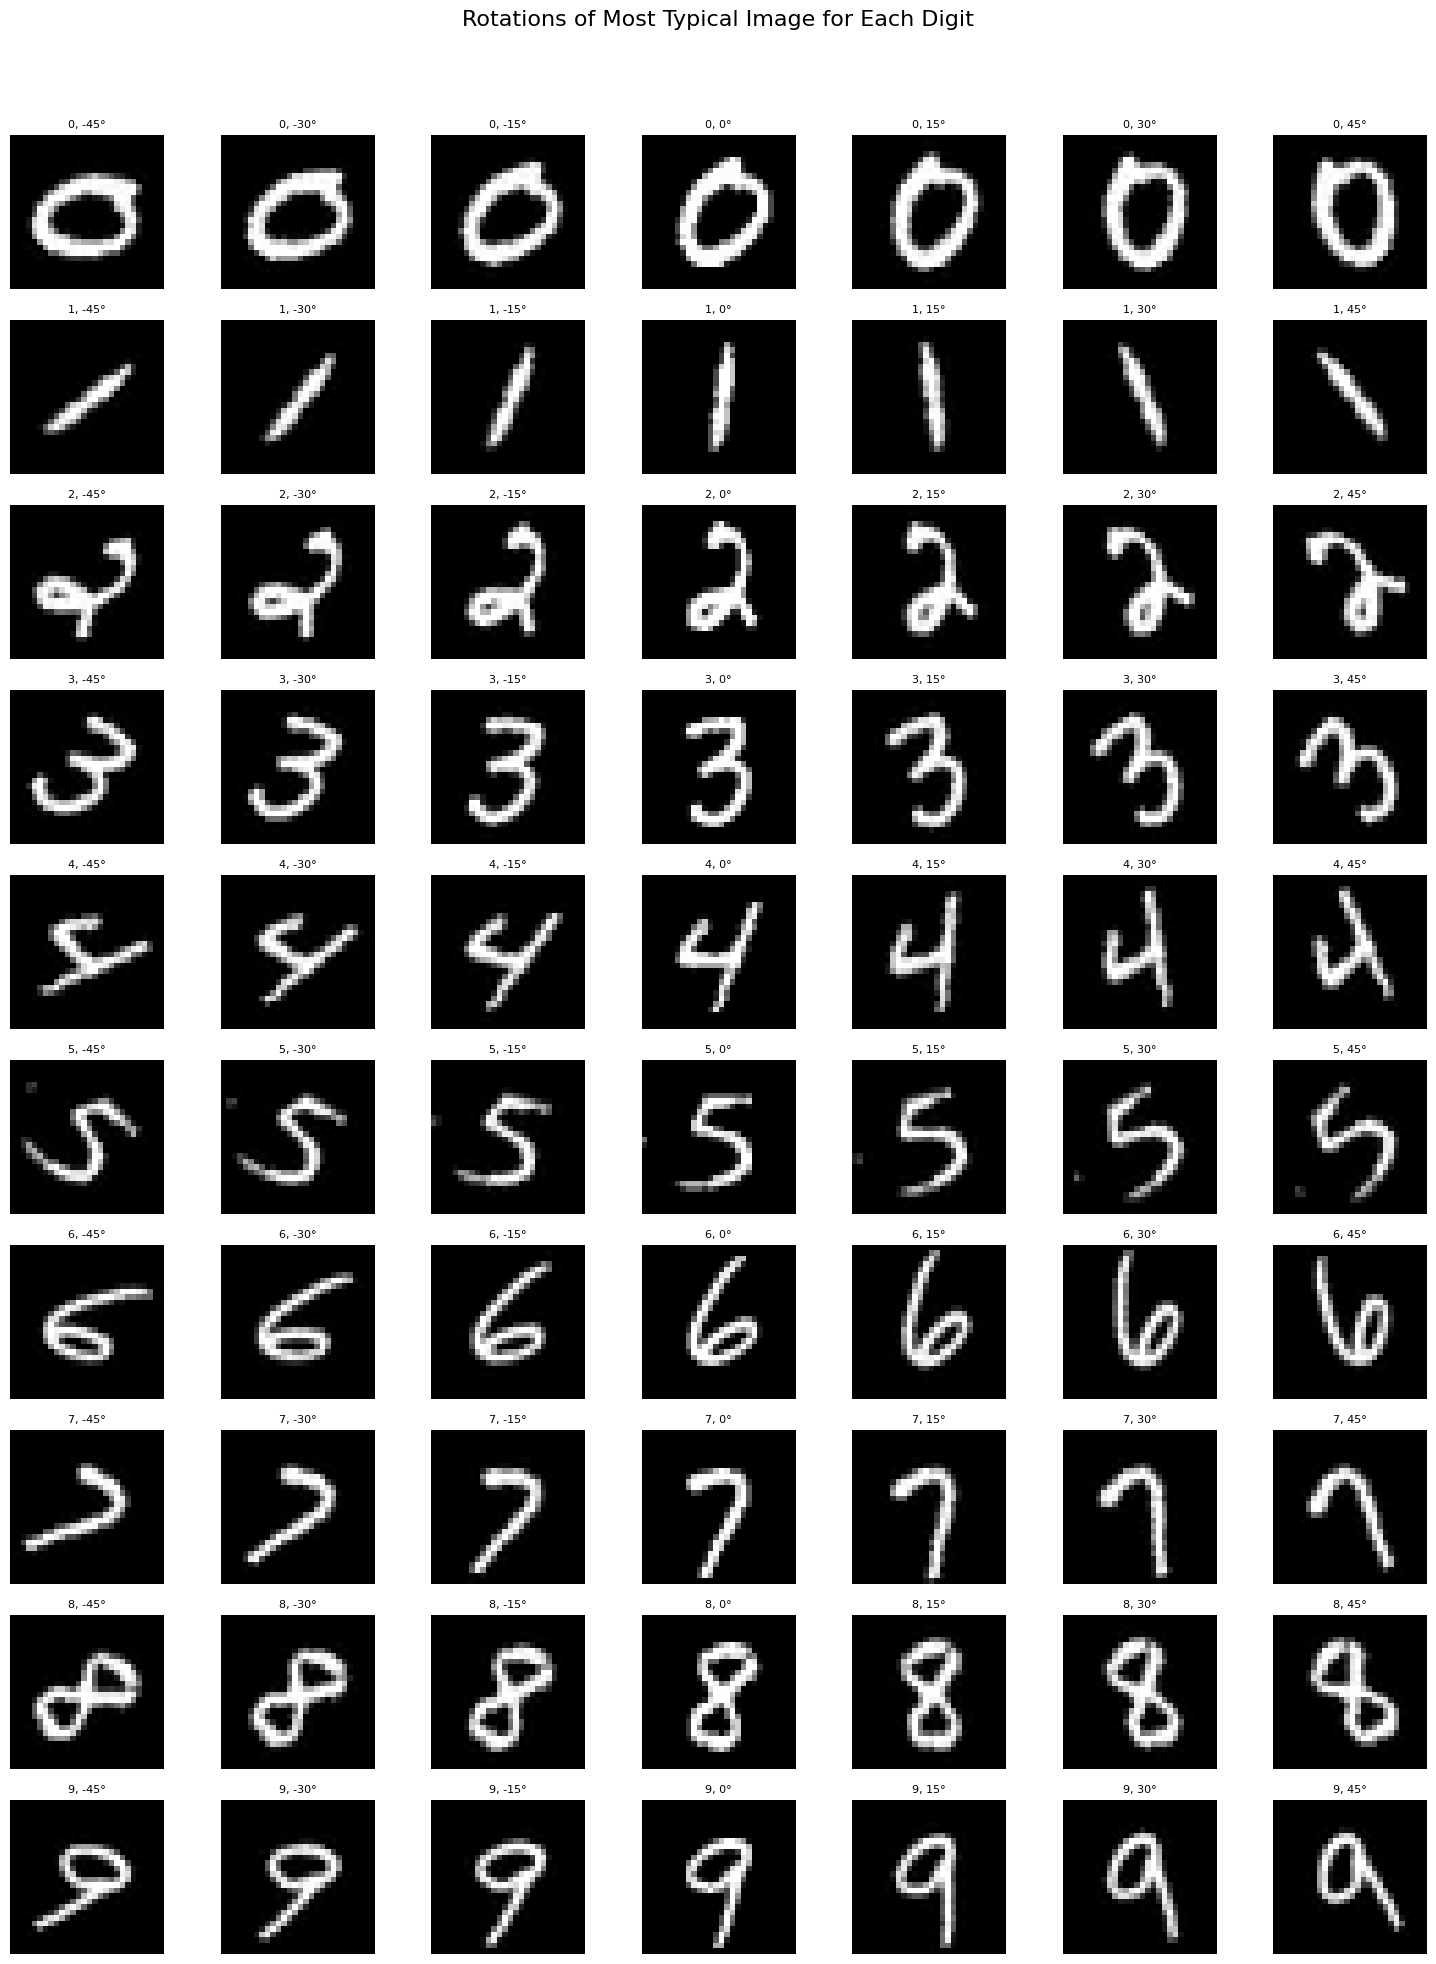

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Define the rotation angles
rotation_angles = [-45, -30, -15, 0, 15, 30, 45]
padding_size = 8  # Padding to prevent digit cut-off

# Set up the plot
fig, axes = plt.subplots(10, len(rotation_angles), figsize=(15, 20))
fig.suptitle("Rotations of Most Typical Image for Each Digit", fontsize=16)

for digit in range(10):
    # Filter images of the current digit
    digit_images = x_train[y_train == digit]

    # Calculate the average image for this digit
    average_image = np.mean(digit_images, axis=0)

    # Calculate distances of each image from the average image
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Find the most typical image (closest to the average)
    most_typical_index = np.argsort(distances)[0]  # Get the index of the most typical image
    most_typical_image = digit_images[most_typical_index]  # Retrieve the most typical image

    # Pad the most typical image to prevent cut-off during rotation
    padded_image = np.pad(most_typical_image, padding_size, mode='constant', constant_values=0)

    for i, angle in enumerate(rotation_angles):
        # Rotate the padded image
        rotated_padded_image = rotate(padded_image, angle, reshape=False)

        # Crop back to original size (28x28)
        start = padding_size
        end = start + 28
        rotated_image = rotated_padded_image[start:end, start:end]

        # Display the rotated image
        axes[digit, i].imshow(rotated_image, cmap='gray')
        axes[digit, i].set_title(f"{digit}, {angle}°", fontsize=8)
        axes[digit, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for title
plt.show()


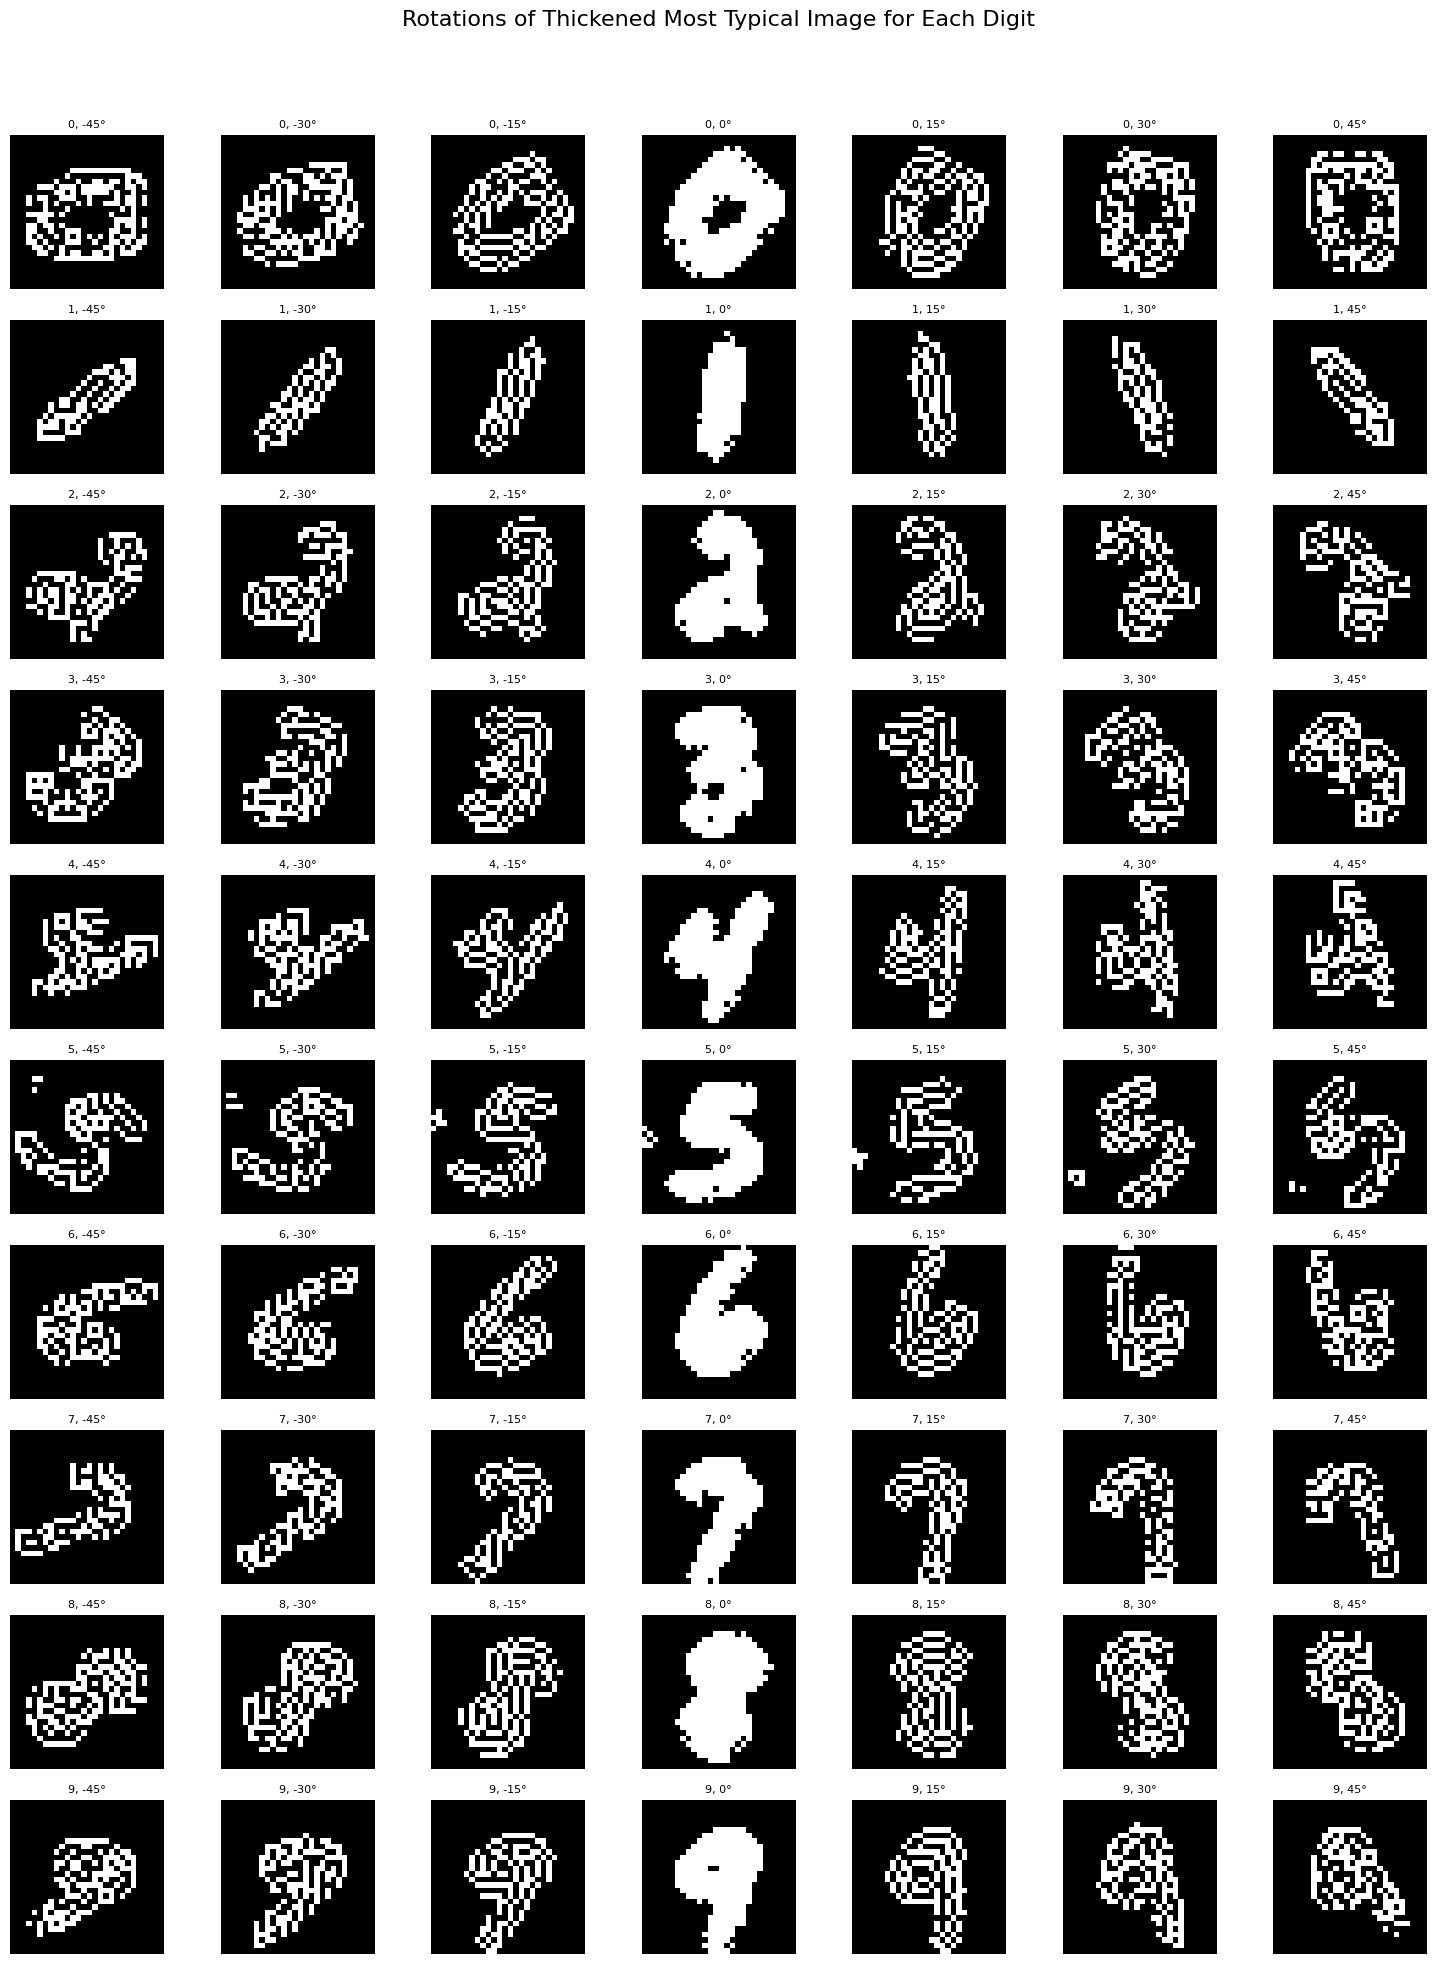

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, binary_dilation
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Define the rotation angles
rotation_angles = [-45, -30, -15, 0, 15, 30, 45]
padding_size = 8  # Padding to prevent digit cut-off

# Threshold for binarizing the image
threshold = 50

# Set up the plot
fig, axes = plt.subplots(10, len(rotation_angles), figsize=(15, 20))
fig.suptitle("Rotations of Thickened Most Typical Image for Each Digit", fontsize=16)

for digit in range(10):
    # Filter images of the current digit
    digit_images = x_train[y_train == digit]

    # Calculate the average image for this digit
    average_image = np.mean(digit_images, axis=0)

    # Calculate distances of each image from the average image
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Find the most typical image (closest to the average)
    most_typical_index = np.argsort(distances)[0]  # Get the index of the most typical image
    most_typical_image = digit_images[most_typical_index]  # Retrieve the most typical image

    # Pad the most typical image to prevent cut-off during rotation
    padded_image = np.pad(most_typical_image, padding_size, mode='constant', constant_values=0)

    # Binarize the image
    binary_image = padded_image > threshold  # Convert to binary (True for digit, False for background)

    # Apply dilation to thicken the digit
    thickened_image = binary_dilation(binary_image, iterations=2)  # Increase iterations for thicker edges

    for i, angle in enumerate(rotation_angles):
        # Rotate the thickened image
        rotated_padded_image = rotate(thickened_image, angle, reshape=False)

        # Crop back to original size (28x28)
        start = padding_size
        end = start + 28
        rotated_image = rotated_padded_image[start:end, start:end]

        # Display the rotated thickened image
        axes[digit, i].imshow(rotated_image, cmap='gray')
        axes[digit, i].set_title(f"{digit}, {angle}°", fontsize=8)
        axes[digit, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for title
plt.show()


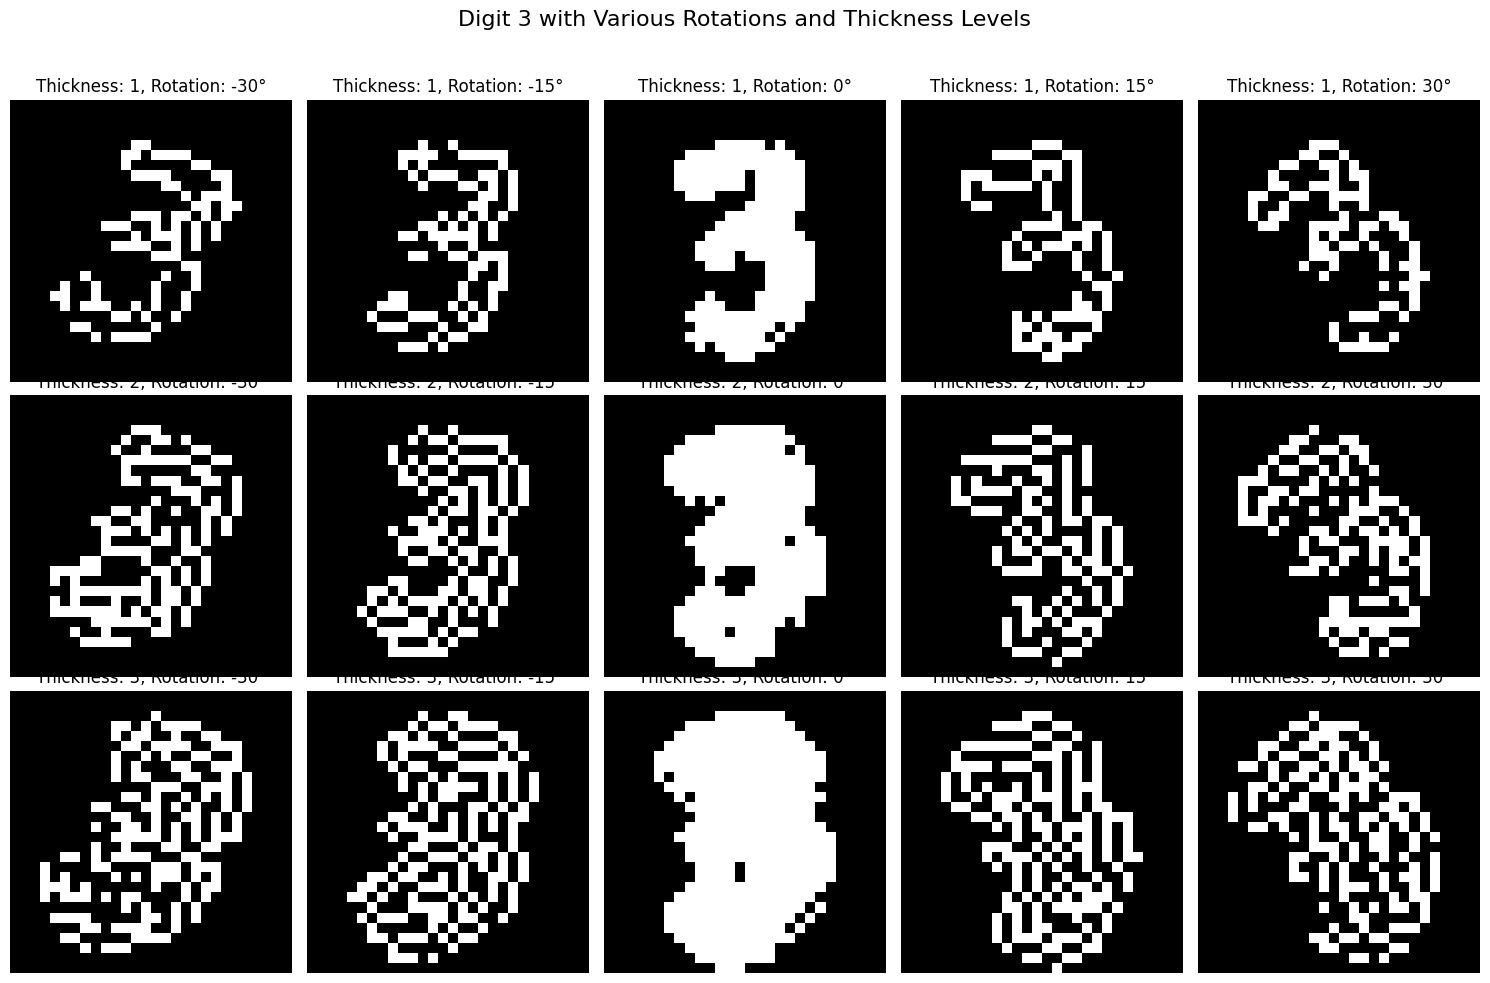

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, binary_dilation
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Separate the images of a specific digit, e.g., digit "3"
digit = 3  # choose the digit you want to process
digit_images = x_train[y_train == digit]

# Calculate the average image for this digit
average_image = np.mean(digit_images, axis=0)

# Calculate distances of each image from the average image
distances = [np.linalg.norm(img - average_image) for img in digit_images]

# Find the most typical image
most_typical_indices = np.argsort(distances)[:1]  # only take the first most typical image
most_typical_image = digit_images[most_typical_indices[0]]  # get the most typical image

# Define a range of rotation angles and thickness levels
rotation_angles = [-30, -15, 0, 15, 30]
thickness_levels = [ 1, 2, 3]  # Vary the number of dilation iterations

# Define padding size to prevent digit cut-off
padding_size = 8
padded_image = np.pad(most_typical_image, padding_size, mode='constant', constant_values=0)

# Set up the plot
fig, axes = plt.subplots(len(thickness_levels), len(rotation_angles), figsize=(15, 10))
fig.suptitle(f"Digit {digit} with Various Rotations and Thickness Levels", fontsize=16)

for j, thickness in enumerate(thickness_levels):
    # Apply binary dilation to thicken the digit (convert to binary first)
    binary_image = padded_image > 50  # Binarize with a threshold
    thickened_image = binary_dilation(binary_image, iterations=thickness)

    for i, angle in enumerate(rotation_angles):
        # Rotate the thickened image
        rotated_padded_image = rotate(thickened_image, angle, reshape=False)

        # Crop back to the original size (28x28)
        start = padding_size
        end = start + 28
        rotated_image = rotated_padded_image[start:end, start:end]

        # Display the rotated and thickened image
        axes[j, i].imshow(rotated_image, cmap='gray')
        axes[j, i].set_title(f'Thickness: {thickness}, Rotation: {angle}°')
        axes[j, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


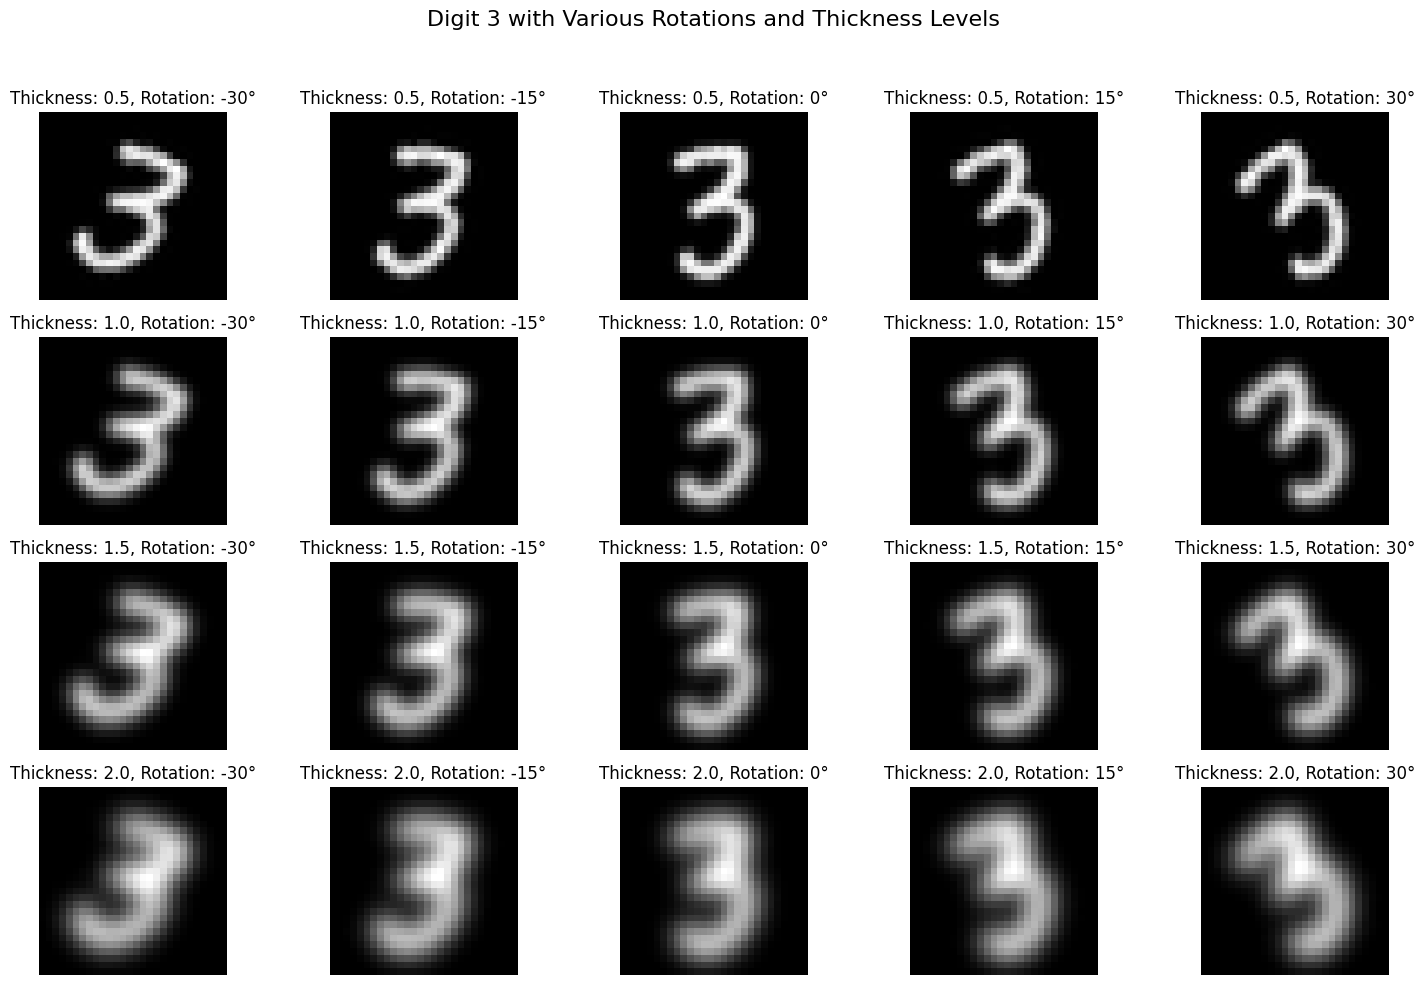

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, gaussian_filter
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Separate the images of a specific digit, e.g., digit "3"
digit = 3  # choose the digit you want to process
digit_images = x_train[y_train == digit]

# Calculate the average image for this digit
average_image = np.mean(digit_images, axis=0)

# Calculate distances of each image from the average image
distances = [np.linalg.norm(img - average_image) for img in digit_images]

# Find the most typical image
most_typical_indices = np.argsort(distances)[:1]  # only take the first most typical image
most_typical_image = digit_images[most_typical_indices[0]]  # get the most typical image

# Define a range of rotation angles and thickness levels
rotation_angles = [-30, -15, 0, 15, 30]
thickness_levels = [0.5, 1.0, 1.5, 2.0]  # Sigma values for Gaussian filter

# Define padding size to prevent digit cut-off during rotation
padding_size = 8
padded_image = np.pad(most_typical_image, padding_size, mode='constant', constant_values=0)

# Set up the plot
fig, axes = plt.subplots(len(thickness_levels), len(rotation_angles), figsize=(15, 10))
fig.suptitle(f"Digit {digit} with Various Rotations and Thickness Levels", fontsize=16)

for j, thickness in enumerate(thickness_levels):
    # Apply Gaussian filter to thicken the digit in grayscale
    thickened_image = gaussian_filter(padded_image, sigma=thickness)

    for i, angle in enumerate(rotation_angles):
        # Rotate the thickened image
        rotated_padded_image = rotate(thickened_image, angle, reshape=False)

        # Crop back to the original size (28x28)
        start = padding_size
        end = start + 28
        rotated_image = rotated_padded_image[start:end, start:end]

        # Display the rotated and thickened image
        axes[j, i].imshow(rotated_image, cmap='gray')
        axes[j, i].set_title(f'Thickness: {thickness}, Rotation: {angle}°')
        axes[j, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


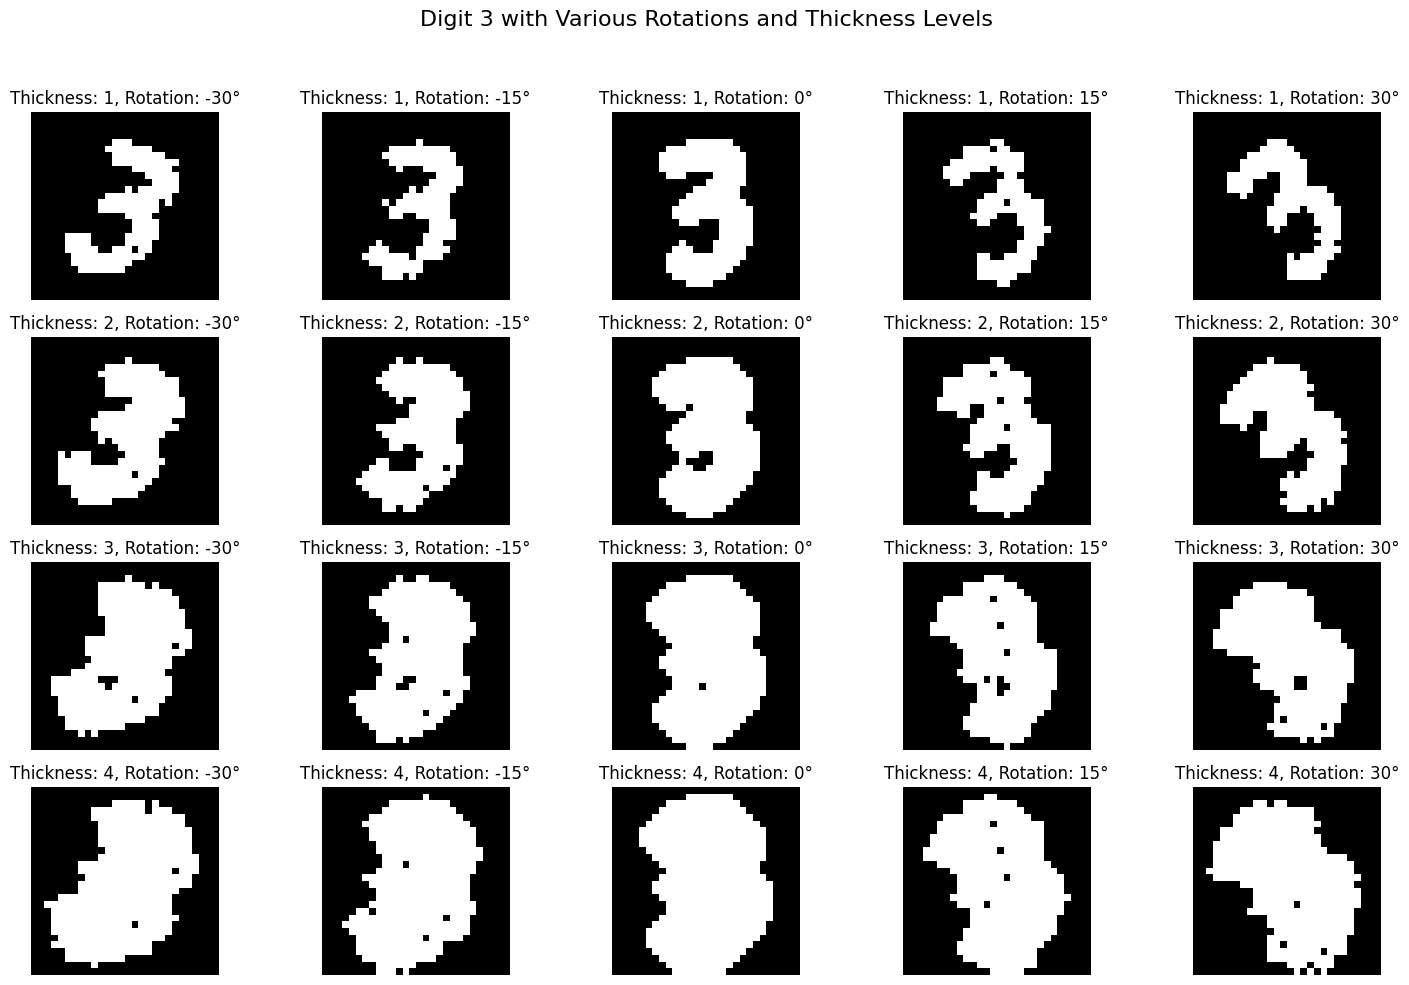

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, binary_dilation
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Separate the images of a specific digit, e.g., digit "3"
digit = 3  # choose the digit you want to process
digit_images = x_train[y_train == digit]

# Calculate the average image for this digit
average_image = np.mean(digit_images, axis=0)

# Calculate distances of each image from the average image
distances = [np.linalg.norm(img - average_image) for img in digit_images]

# Find the most typical image
most_typical_indices = np.argsort(distances)[:1]  # only take the first most typical image
most_typical_image = digit_images[most_typical_indices[0]]  # get the most typical image

# Define a range of rotation angles and thickness levels
rotation_angles = [-30, -15, 0, 15, 30]
thickness_levels = [1, 2, 3, 4]  # Number of dilation iterations

# Define padding size to prevent digit cut-off during rotation
padding_size = 8
padded_image = np.pad(most_typical_image, padding_size, mode='constant', constant_values=0)

# Set up the plot
fig, axes = plt.subplots(len(thickness_levels), len(rotation_angles), figsize=(15, 10))
fig.suptitle(f"Digit {digit} with Various Rotations and Thickness Levels", fontsize=16)

for j, thickness in enumerate(thickness_levels):
    # Apply binary dilation to thicken the digit (convert to binary first)
    binary_image = padded_image > 50  # Binarize with a threshold
    thickened_image = binary_dilation(binary_image, iterations=thickness)

    for i, angle in enumerate(rotation_angles):
        # Rotate the thickened image with anti-aliasing
        rotated_padded_image = rotate(thickened_image, angle, reshape=False, order=1)  # order=1 for bilinear interpolation

        # Crop back to the original size (28x28)
        start = padding_size
        end = start + 28
        rotated_image = rotated_padded_image[start:end, start:end]

        # Ensure the image is still binary after rotation
        rotated_image = (rotated_image > 0).astype(np.uint8) * 255  # Convert back to binary for display

        # Display the rotated and thickened image
        axes[j, i].imshow(rotated_image, cmap='gray')
        axes[j, i].set_title(f'Thickness: {thickness}, Rotation: {angle}°')
        axes[j, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


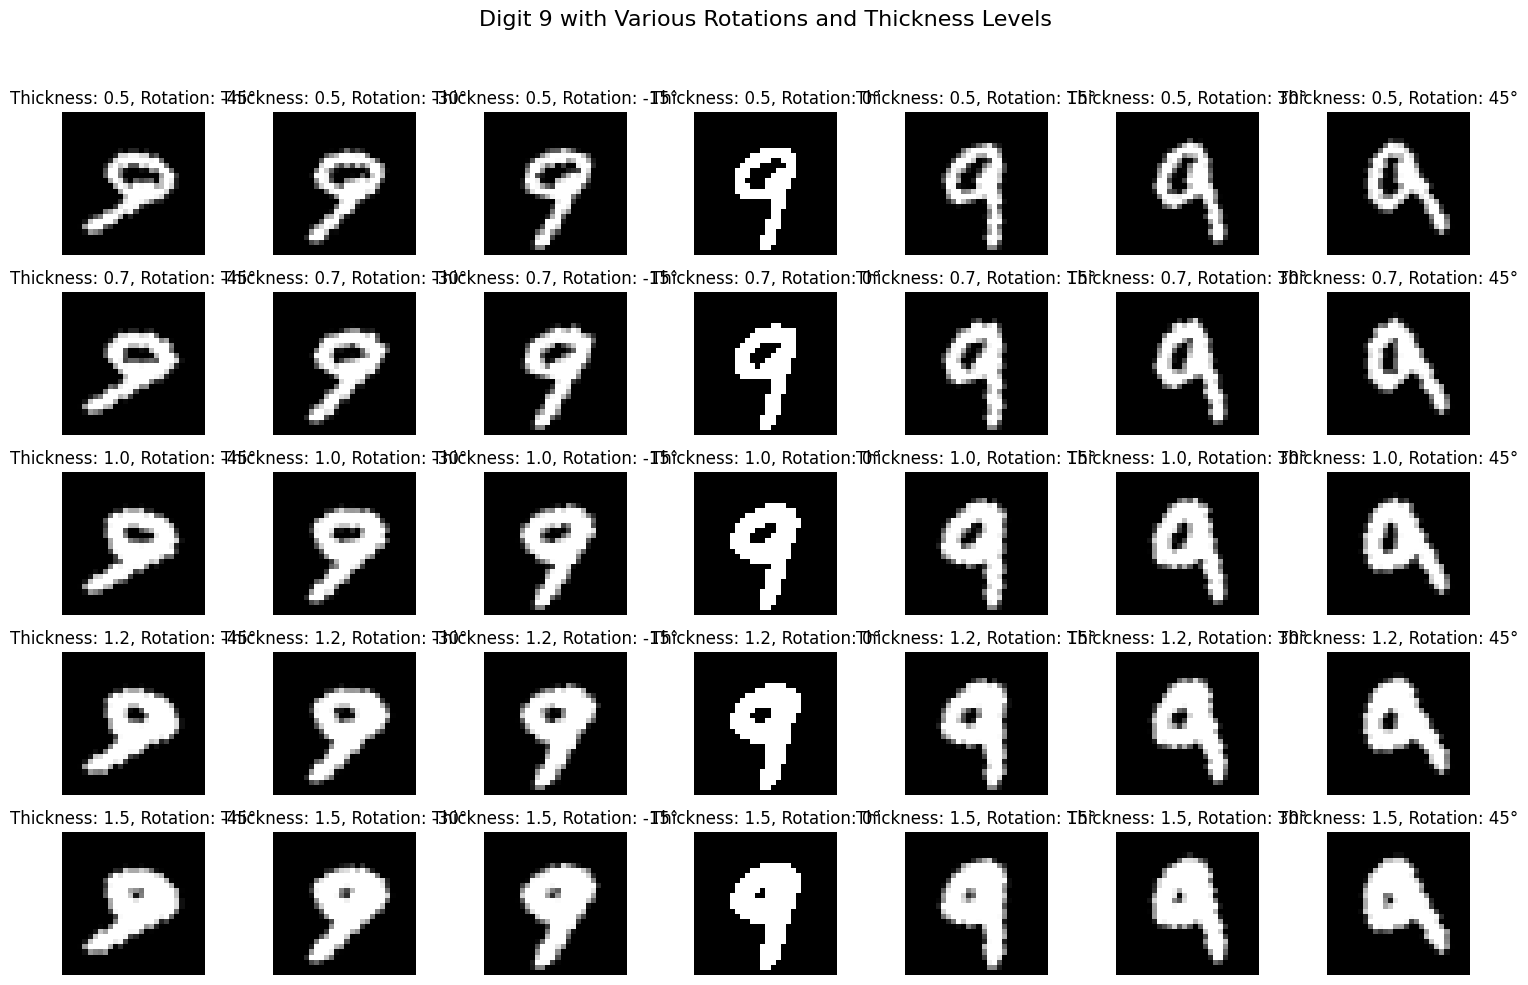

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, gaussian_filter
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Separate the images of a specific digit, e.g., digit "3"
digit = 9  # choose the digit you want to process
digit_images = x_train[y_train == digit]

# Calculate the average image for this digit
average_image = np.mean(digit_images, axis=0)

# Calculate distances of each image from the average image
distances = [np.linalg.norm(img - average_image) for img in digit_images]

# Find the most typical image
most_typical_indices = np.argsort(distances)[:1]  # only take the first most typical image
most_typical_image = digit_images[most_typical_indices[0]]  # get the most typical image

# Define a range of rotation angles and thickness levels
rotation_angles = [-45, -30, -15, 0, 15, 30, 45]
thickness_levels = [0.5, 0.7, 1.0, 1.2, 1.5]  # Gaussian kernel standard deviations

# Define padding size to prevent digit cut-off during rotation
padding_size = 8
padded_image = np.pad(most_typical_image, padding_size, mode='constant', constant_values=0)

# Set up the plot
fig, axes = plt.subplots(len(thickness_levels), len(rotation_angles), figsize=(15, 10))
fig.suptitle(f"Digit {digit} with Various Rotations and Thickness Levels", fontsize=16)

for j, thickness in enumerate(thickness_levels):
    # Apply Gaussian filter to thicken the digit
    thickened_image = gaussian_filter(padded_image, sigma=thickness)

    # Convert to binary after Gaussian filtering
    binary_image = (thickened_image > 50).astype(np.uint8) * 255  # Binarize with a threshold

    for i, angle in enumerate(rotation_angles):
        # Rotate the thickened and binarized image with anti-aliasing
        rotated_image = rotate(binary_image, angle, reshape=False, order=1)  # order=1 for bilinear interpolation

        # Crop back to the original size (28x28)
        start = padding_size
        end = start + 28
        rotated_image = rotated_image[start:end, start:end]

        # Display the rotated and thickened image
        axes[j, i].imshow(rotated_image, cmap='gray')
        axes[j, i].set_title(f'Thickness: {thickness}, Rotation: {angle}°')
        axes[j, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, gaussian_filter

# Load the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()

# Define rotation angles and thickness levels
rotation_angles = [-45, -30, -15, 0, 15, 30, 45]
thickness_levels = [0, 0.5, 1.0, 1.5, 2.0]  # Gaussian kernel standard deviations

# Define padding size to prevent digit cut-off during rotation
padding_size = 8

# Initialize an empty list to store the DataFrame rows
rows = []

# Loop through each digit (0-9)
for digit in range(10):
    # Filter images of the current digit
    digit_images = x_train[y_train == digit]

    # Calculate the average image for this digit and its distances
    average_image = np.mean(digit_images, axis=0)
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Identify the indices of the 5 most typical images (closest to the average)
    most_typical_indices = np.argsort(distances)[:5]

    # Loop over the 5 most typical images
    for idx in most_typical_indices:
        original_image = digit_images[idx]

        # Pad the image to allow rotation without cutoff
        padded_image = np.pad(original_image, padding_size, mode='constant', constant_values=0)

        # Generate variations by rotating and thickening
        for angle in rotation_angles:
            # Rotate the image
            rotated_image = rotate(padded_image, angle, reshape=False)

            # Crop back to the original size (28x28)
            start = padding_size
            end = start + 28
            cropped_image = rotated_image[start:end, start:end]

            for thickness in thickness_levels:
                # Apply Gaussian thickening
                thickened_image = gaussian_filter(cropped_image, sigma=thickness)

                # Binarize image to black and white (0 or 255)
                binary_image = (thickened_image > 0.5).astype(np.uint8) * 255

                # Append the data to the list as a dictionary
                rows.append({
                    "Digit": digit,
                    "Original_Index": idx,
                    "Rotation_Angle": angle,
                    "Thickness_Level": thickness,
                    "Image": binary_image
                })

# Convert to a DataFrame
df = pd.DataFrame(rows)

# Display the first few rows of the DataFrame
print(df.head())


   Digit  Original_Index  Rotation_Angle  Thickness_Level  \
0      0            3847             -45              0.0   
1      0            3847             -45              0.5   
2      0            3847             -45              1.0   
3      0            3847             -45              1.5   
4      0            3847             -45              2.0   

                                               Image  
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  


In [ ]:
print(df.shape)

(1750, 5)


In [ ]:
import numpy as np
import tensorflow as tf
from scipy.ndimage import rotate, gaussian_filter
from sklearn.model_selection import KFold

# Load the original MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Define rotation angles and thickness levels
rotation_angles = [-45, -30, -15, 0, 15, 30, 45]
thickness_levels = [0, 0.5, 1.0, 1.5, 2.0]
padding_size = 8

# Initialize lists for manipulated data and labels
manipulated_images = []
manipulated_labels = []

# Generate manipulated data
for digit in range(10):
    digit_images = x_train[y_train == digit]
    average_image = np.mean(digit_images, axis=0)
    distances = [np.linalg.norm(img - average_image) for img in digit_images]
    most_typical_indices = np.argsort(distances)[:5]

    for idx in most_typical_indices:
        original_image = digit_images[idx]
        padded_image = np.pad(original_image, padding_size, mode='constant', constant_values=0)

        for angle in rotation_angles:
            rotated_image = rotate(padded_image, angle, reshape=False)
            cropped_image = rotated_image[padding_size:padding_size + 28, padding_size:padding_size + 28]

            for thickness in thickness_levels:
                if digit == 0 and thickness > 0:
                    continue  # Skip thickening for digit '0'

                thickened_image = gaussian_filter(cropped_image, sigma=thickness)
                manipulated_images.append(thickened_image)
                manipulated_labels.append(digit)

# Convert manipulated data to numpy array
manipulated_images = np.array(manipulated_images).reshape(-1, 28, 28, 1).astype("float32") / 255.0
manipulated_labels = np.array(manipulated_labels)

# Prepare original MNIST data for model
x_train_original = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_original = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define CNN model function
def build_cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cross_validate_model(x_data, y_data):
    fold_accuracies = []
    test_error_rates = []

    for train_index, val_index in kf.split(x_data):
        X_train, X_val = x_data[train_index], x_data[val_index]
        y_train_fold, y_val = y_data[train_index], y_data[val_index]

        model = build_cnn_model((28, 28, 1))
        model.fit(X_train, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        fold_accuracies.append(val_accuracy)

        test_loss, test_accuracy = model.evaluate(x_test_original, y_test, verbose=0)
        test_error_rates.append(1 - test_accuracy)

    cross_validated_accuracy = np.mean(fold_accuracies)
    final_test_accuracy = np.mean([1 - err_rate for err_rate in test_error_rates])
    final_test_error_rate = np.mean(test_error_rates)

    return cross_validated_accuracy, final_test_accuracy, final_test_error_rate

# Run cross-validation on the original MNIST data
print("Evaluating on Original MNIST Data:")
orig_cv_accuracy, orig_test_accuracy, orig_test_error_rate = cross_validate_model(x_train_original, y_train)
print(f"Cross-validated Accuracy: {orig_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {orig_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {orig_test_error_rate * 100:.2f}%")

# Run cross-validation on the manipulated MNIST data
print("\nEvaluating on Manipulated MNIST Data:")
manip_cv_accuracy, manip_test_accuracy, manip_test_error_rate = cross_validate_model(manipulated_images, manipulated_labels)
print(f"Cross-validated Accuracy: {manip_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {manip_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {manip_test_error_rate * 100:.2f}%")


Evaluating on Original MNIST Data:
Cross-validated Accuracy: 98.82%
Test Set Accuracy: 98.83%
Test Set Error Rate: 1.17%

Evaluating on Manipulated MNIST Data:
Cross-validated Accuracy: 100.00%
Test Set Accuracy: 70.75%
Test Set Error Rate: 29.25%


In [ ]:


print(manipulated_images.shape, manipulated_labels.shape)
print(x_train_original.shape)


(1610, 28, 28, 1) (1610,)
(60000, 28, 28, 1)


In [ ]:
import numpy as np
import tensorflow as tf
from scipy.ndimage import rotate, gaussian_filter
from sklearn.model_selection import KFold

# Load the original MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Define rotation angles and thickness levels
rotation_angles = [-45, -30, -15, 0, 15, 30, 45]
thickness_levels = [0, 0.5, 0.7, 1.0, 1.2, 1.5]
padding_size = 8

# Initialize a list to store images and labels
manipulated_train_images = []
manipulated_train_labels = []

# Loop through each digit
for digit in range(10):
    # Filter images of the current digit
    digit_images = x_train[y_train == digit]
    # Calculate distances and find most typical images
    distances = [np.linalg.norm(img - np.mean(digit_images, axis=0)) for img in digit_images]
    most_typical_indices = np.argsort(distances)[:5]

    # Loop through most typical images
    for idx in most_typical_indices:
        original_image = digit_images[idx]
        padded_image = np.pad(original_image, padding_size, mode='constant', constant_values=0)

        # Loop through rotation angles and thickness levels
        for angle in rotation_angles:
            rotated_image = rotate(padded_image, angle, reshape=False)[padding_size:padding_size + 28, padding_size:padding_size + 28]

            for thickness in thickness_levels:
                # Apply Gaussian thickening
                if thickness > 0:
                    thickened_image = gaussian_filter(rotated_image, sigma=thickness)
                else:
                    thickened_image = rotated_image  # No thickening for sigma = 0

                # Append to the list
                manipulated_train_images.append(thickened_image)
                manipulated_train_labels.append(digit)

# Convert to numpy arrays
manipulated_train_images = np.array(manipulated_train_images)
manipulated_train_labels = np.array(manipulated_train_labels)

# Print the total count to verify
print("Total manipulated images:", manipulated_train_images.shape[0])


Total manipulated images: 2100


In [ ]:
import numpy as np
import tensorflow as tf
from scipy.ndimage import rotate, gaussian_filter
from sklearn.model_selection import KFold

# Load the original MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Define rotation angles and thickness levels
rotation_angles = np.arange(-45, 46, 15)  # Changing angles does not change accuarcy
thickness_levels = [0, 0.5, 0.7, 1.0, 1.2, 1.5]
padding_size = 8

# Initialize lists for manipulated data and labels
manipulated_images = []
manipulated_labels = []

# Generate manipulated data
for digit in range(10):
    digit_images = x_train[y_train == digit]
    average_image = np.mean(digit_images, axis=0)
    distances = [np.linalg.norm(img - average_image) for img in digit_images]
    most_typical_indices = np.argsort(distances)[:5]

    for idx in most_typical_indices:
        original_image = digit_images[idx]
        padded_image = np.pad(original_image, padding_size, mode='constant', constant_values=0)

        for angle in rotation_angles:
            rotated_image = rotate(padded_image, angle, reshape=False)
            cropped_image = rotated_image[padding_size:padding_size + 28, padding_size:padding_size + 28]

            for thickness in thickness_levels:
                if digit == 0 and thickness > 0:
                    continue  # Skip thickening for digit '0'

                thickened_image = gaussian_filter(cropped_image, sigma=thickness)
                manipulated_images.append(thickened_image)
                manipulated_labels.append(digit)

# Convert manipulated data to numpy array
manipulated_images = np.array(manipulated_images).reshape(-1, 28, 28, 1).astype("float32") / 255.0
manipulated_labels = np.array(manipulated_labels)

# Prepare original MNIST data for model
x_train_original = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_original = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define CNN model function
def build_cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cross_validate_model(x_data, y_data):
    fold_accuracies = []
    test_error_rates = []

    for train_index, val_index in kf.split(x_data):
        X_train, X_val = x_data[train_index], x_data[val_index]
        y_train_fold, y_val = y_data[train_index], y_data[val_index]

        model = build_cnn_model((28, 28, 1))
        model.fit(X_train, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        fold_accuracies.append(val_accuracy)

        test_loss, test_accuracy = model.evaluate(x_test_original, y_test, verbose=0)
        test_error_rates.append(1 - test_accuracy)

    cross_validated_accuracy = np.mean(fold_accuracies)
    final_test_accuracy = np.mean([1 - err_rate for err_rate in test_error_rates])
    final_test_error_rate = np.mean(test_error_rates)

    return cross_validated_accuracy, final_test_accuracy, final_test_error_rate

# Run cross-validation on the original MNIST data
print("Evaluating on Original MNIST Data:")
orig_cv_accuracy, orig_test_accuracy, orig_test_error_rate = cross_validate_model(x_train_original, y_train)
print(f"Cross-validated Accuracy: {orig_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {orig_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {orig_test_error_rate * 100:.2f}%")

# Run cross-validation on the manipulated MNIST data
print("\nEvaluating on Manipulated MNIST Data:")
manip_cv_accuracy, manip_test_accuracy, manip_test_error_rate = cross_validate_model(manipulated_images, manipulated_labels)
print(f"Cross-validated Accuracy: {manip_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {manip_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {manip_test_error_rate * 100:.2f}%")


Evaluating on Original MNIST Data:
Cross-validated Accuracy: 98.72%
Test Set Accuracy: 98.92%
Test Set Error Rate: 1.08%

Evaluating on Manipulated MNIST Data:
Cross-validated Accuracy: 100.00%
Test Set Accuracy: 74.63%
Test Set Error Rate: 25.37%


In [ ]:
import numpy as np
import tensorflow as tf
from scipy.ndimage import rotate, gaussian_filter
from sklearn.model_selection import KFold

# Load the original MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Define rotation angles and thickness levels
rotation_angles = np.arange(-45, 46, 15)  # Range of angles from -45 to 45 degrees, in steps of 15
thickness_levels = [0, 0.5, 0.7, 1.0, 1.2, 1.5]
padding_size = 8

# Initialize lists for manipulated data and labels
manipulated_images = []
manipulated_labels = []

# Generate manipulated data
for digit in range(10):
    digit_images = x_train[y_train == digit]
    average_image = np.mean(digit_images, axis=0)

    # Calculate distances for each image from the average image
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Identify the indices of the 5 most typical images (closest to the average)
    most_typical_indices = np.argsort(distances)[:5]

    # Identify the indices of the 10 most different images (farthest from the average)
    most_different_indices = np.argsort(distances)[-10:]

    # Combine the indices: 5 most typical and 10 most different
    selected_indices = np.concatenate([most_typical_indices, most_different_indices])

    # Loop through selected indices (most typical and most different)
    for idx in selected_indices:
        original_image = digit_images[idx]
        padded_image = np.pad(original_image, padding_size, mode='constant', constant_values=0)

        for angle in rotation_angles:
            rotated_image = rotate(padded_image, angle, reshape=False)
            cropped_image = rotated_image[padding_size:padding_size + 28, padding_size:padding_size + 28]

            for thickness in thickness_levels:
                if digit == 0 and thickness > 0:
                    continue  # Skip thickening for digit '0'

                thickened_image = gaussian_filter(cropped_image, sigma=thickness)
                manipulated_images.append(thickened_image)
                manipulated_labels.append(digit)

# Convert manipulated data to numpy array
manipulated_images = np.array(manipulated_images).reshape(-1, 28, 28, 1).astype("float32") / 255.0
manipulated_labels = np.array(manipulated_labels)

# Prepare original MNIST data for model
x_train_original = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_original = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define CNN model function
def build_cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cross_validate_model(x_data, y_data):
    fold_accuracies = []
    test_error_rates = []

    for train_index, val_index in kf.split(x_data):
        X_train, X_val = x_data[train_index], x_data[val_index]
        y_train_fold, y_val = y_data[train_index], y_data[val_index]

        model = build_cnn_model((28, 28, 1))
        model.fit(X_train, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        fold_accuracies.append(val_accuracy)

        test_loss, test_accuracy = model.evaluate(x_test_original, y_test, verbose=0)
        test_error_rates.append(1 - test_accuracy)

    cross_validated_accuracy = np.mean(fold_accuracies)
    final_test_accuracy = np.mean([1 - err_rate for err_rate in test_error_rates])
    final_test_error_rate = np.mean(test_error_rates)

    return cross_validated_accuracy, final_test_accuracy, final_test_error_rate

# Run cross-validation on the original MNIST data
print("Evaluating on Original MNIST Data:")
orig_cv_accuracy, orig_test_accuracy, orig_test_error_rate = cross_validate_model(x_train_original, y_train)
print(f"Cross-validated Accuracy: {orig_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {orig_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {orig_test_error_rate * 100:.2f}%")

# Run cross-validation on the manipulated MNIST data
print("\nEvaluating on Manipulated MNIST Data:")
manip_cv_accuracy, manip_test_accuracy, manip_test_error_rate = cross_validate_model(manipulated_images, manipulated_labels)
print(f"Cross-validated Accuracy: {manip_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {manip_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {manip_test_error_rate * 100:.2f}%")


Evaluating on Original MNIST Data:
Cross-validated Accuracy: 98.85%
Test Set Accuracy: 98.92%
Test Set Error Rate: 1.08%

Evaluating on Manipulated MNIST Data:
Cross-validated Accuracy: 98.98%
Test Set Accuracy: 78.02%
Test Set Error Rate: 21.98%


In [ ]:
import numpy as np
import tensorflow as tf
from scipy.ndimage import rotate, gaussian_filter
from sklearn.model_selection import KFold

# Load the original MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Define rotation angles and thickness levels
rotation_angles = np.arange(-45, 46, 15)  # Range of angles from -45 to 45 degrees, in steps of 15
thickness_levels = [0, 0.5, 1.0, 1.5, 2.0]
padding_size = 8

# Initialize lists for manipulated data and labels
manipulated_images = []
manipulated_labels = []
typical_manipulated_images = []
typical_manipulated_labels = []

# Generate manipulated data
for digit in range(10):
    digit_images = x_train[y_train == digit]
    average_image = np.mean(digit_images, axis=0)

    # Calculate distances for each image from the average image
    distances = [np.linalg.norm(img - average_image) for img in digit_images]

    # Identify the indices of the 5 most typical images (closest to the average)
    most_typical_indices = np.argsort(distances)[:5]

    # Identify the indices of the 10 most different images (farthest from the average)
    most_different_indices = np.argsort(distances)[-10:]

    # Combine the indices: 5 most typical and 10 most different
    selected_indices = np.concatenate([most_typical_indices, most_different_indices])

    # Loop through selected indices (most typical and most different)
    for idx in selected_indices:
        original_image = digit_images[idx]
        padded_image = np.pad(original_image, padding_size, mode='constant', constant_values=0)

        for angle in rotation_angles:
            rotated_image = rotate(padded_image, angle, reshape=False)
            cropped_image = rotated_image[padding_size:padding_size + 28, padding_size:padding_size + 28]

            for thickness in thickness_levels:
                if digit == 0 and thickness > 0:
                    continue  # Skip thickening for digit '0'

                thickened_image = gaussian_filter(cropped_image, sigma=thickness)
                manipulated_images.append(thickened_image)
                manipulated_labels.append(digit)

    # Generate manipulated data for just the most typical images
    for idx in most_typical_indices:
        original_image = digit_images[idx]
        padded_image = np.pad(original_image, padding_size, mode='constant', constant_values=0)

        for angle in rotation_angles:
            rotated_image = rotate(padded_image, angle, reshape=False)
            cropped_image = rotated_image[padding_size:padding_size + 28, padding_size:padding_size + 28]

            for thickness in thickness_levels:
                if digit == 0 and thickness > 0:
                    continue  # Skip thickening for digit '0'

                thickened_image = gaussian_filter(cropped_image, sigma=thickness)
                typical_manipulated_images.append(thickened_image)
                typical_manipulated_labels.append(digit)

# Convert manipulated data to numpy array
manipulated_images = np.array(manipulated_images).reshape(-1, 28, 28, 1).astype("float32") / 255.0
manipulated_labels = np.array(manipulated_labels)

typical_manipulated_images = np.array(typical_manipulated_images).reshape(-1, 28, 28, 1).astype("float32") / 255.0
typical_manipulated_labels = np.array(typical_manipulated_labels)

# Prepare original MNIST data for model
x_train_original = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test_original = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define CNN model function
def build_cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cross_validate_model(x_data, y_data):
    fold_accuracies = []
    test_error_rates = []

    for train_index, val_index in kf.split(x_data):
        X_train, X_val = x_data[train_index], x_data[val_index]
        y_train_fold, y_val = y_data[train_index], y_data[val_index]

        model = build_cnn_model((28, 28, 1))
        model.fit(X_train, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        fold_accuracies.append(val_accuracy)

        test_loss, test_accuracy = model.evaluate(x_test_original, y_test, verbose=0)
        test_error_rates.append(1 - test_accuracy)

    cross_validated_accuracy = np.mean(fold_accuracies)
    final_test_accuracy = np.mean([1 - err_rate for err_rate in test_error_rates])
    final_test_error_rate = np.mean(test_error_rates)

    return cross_validated_accuracy, final_test_accuracy, final_test_error_rate

# Run cross-validation on the original MNIST data
print("Evaluating on Original MNIST Data:")
orig_cv_accuracy, orig_test_accuracy, orig_test_error_rate = cross_validate_model(x_train_original, y_train)
print(f"Cross-validated Accuracy: {orig_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {orig_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {orig_test_error_rate * 100:.2f}%")

# Run cross-validation on the manipulated MNIST data (most typical + most different)
print("\nEvaluating on Manipulated MNIST Data (Most Typical + Most Different):")
manip_cv_accuracy, manip_test_accuracy, manip_test_error_rate = cross_validate_model(manipulated_images, manipulated_labels)
print(f"Cross-validated Accuracy: {manip_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {manip_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {manip_test_error_rate * 100:.2f}%")

# Run cross-validation on the manipulated MNIST data (only most typical)
print("\nEvaluating on Manipulated MNIST Data (Only Most Typical):")
typical_manip_cv_accuracy, typical_manip_test_accuracy, typical_manip_test_error_rate = cross_validate_model(typical_manipulated_images, typical_manipulated_labels)
print(f"Cross-validated Accuracy: {typical_manip_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {typical_manip_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {typical_manip_test_error_rate * 100:.2f}%")


Evaluating on Original MNIST Data:
Cross-validated Accuracy: 98.81%
Test Set Accuracy: 98.94%
Test Set Error Rate: 1.06%

Evaluating on Manipulated MNIST Data (Most Typical + Most Different):
Cross-validated Accuracy: 97.37%
Test Set Accuracy: 77.90%
Test Set Error Rate: 22.10%

Evaluating on Manipulated MNIST Data (Only Most Typical):
Cross-validated Accuracy: 100.00%
Test Set Accuracy: 71.33%
Test Set Error Rate: 28.67%
